# NLTK Chapter 3

## Processing Raw Text

*The html version of this chapter in the NLTK book is available [here](https://www.nltk.org/book/ch03.html#exercises "Ch03 Exercises").*

### 8   Exercises

###### 1. 

☼ Define a string `s = 'colorless'`. Write a Python statement that changes this to "colourless" using only the slice and concatenation operations.

In [1]:
s = 'colorless'
s = s[:4] + 'u' + s[4:]
s

'colourless'

##### 2.

☼ We can use the slice notation to remove morphological endings on words. For example, `'dogs'[:-1]` removes the last character of `dogs`, leaving `dog`. Use slice notation to remove the affixes from these words (we've inserted a hyphen to indicate the affix boundary, but omit this from your strings): `dish-es`, `run-ning`, `nation-ality`, `un-do`, `pre-heat`.

In [2]:
affixed = [('dishes', 2), 
           ('running', 4),
           ('nationality', 5),
           ('undo', 2),
           ('preheat', 4)]

print([s[:-a] for s, a in affixed])

['dish', 'run', 'nation', 'un', 'pre']


##### 3.

☼ We saw how we can generate an `IndexError` by indexing beyond the end of a string. Is it possible to construct an index that goes too far to the left, before the start of the string?

*Yes.  I'm not going to run the code in my notebook, because then the cells below this one wouldn't run.*

```
>>>trial = "trial"
>>>for i in range(1, len(trial) + 2):
>>>    print(trial[-i])
    
l
a
i
r
t
---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
<ipython-input-21-98077138b076> in <module>
      1 trial = "trial"
      2 for i in range(1, len(trial) + 2):
----> 3     print(trial[-i])

IndexError: string index out of range
```

##### 4. 

☼ We can specify a "step" size for the slice. The following returns every second character within the slice: `monty[6:11:2]`. It also works in the reverse direction: `monty[10:5:-2]` Try these for yourself, then experiment with different step values.

In [3]:
# A Czech tongue twister:
tt = "Třistatřiatřicet stříbrných křepelek přeletělo přes třistatřiatřicet stříbrných střech."

# Every other letter
tt[::2]

'Tittitie tírýhkeee řltl řstittitie tírýhsřc.'

In [4]:
# Every other letter from the end
tt[::-2]

'.cřshýrít eitittitsř ltlř eeekhýrít eitittiT'

In [5]:
# Every third letter
tt[::3]

'Tstaittbý el etoř iaiřesínhtc'

*You get the point...*

##### 5. 

☼ What happens if you ask the interpreter to evaluate `monty[::-1]`? Explain why this is a reasonable result.

*It prints the word backwards.  It's simply printing from the end by steps of -1:*

In [6]:
"redrum"[::-1]

'murder'

##### 6.

☼ Describe the class of strings matched by the following regular expressions.

a. `[a-zA-Z]+`

b. `[A-Z][a-z]*`

c. `p[aeiou]{,2}t`

d. `\d+(\.\d+)?`

e. `([^aeiou][aeiou][^aeiou])*`

f. `\w+|[^\w\s]+`

Test your answers using `nltk.re_show()`.

*__a.__ `[a-zA-Z]+` will match anything alphabetical:*

In [7]:
import nltk, re

nltk.re_show(r'[a-zA-Z]+', "cAMELCASE 6186258313 hybr1d")

{cAMELCASE} 6186258313 {hybr}1{d}


<i>__b.__ `[A-Z][a-z]*` will match words beginning with uppercase letters, or any uppercase letters in other positions:</i>

In [8]:
test = 'I think words beginning with Uppercase Letters will be matched, ' \
       'or any uppercase letters found in oTHER positions.'

nltk.re_show(r'[A-Z][a-z]*', test)

{I} think words beginning with {Uppercase} {Letters} will be matched, or any uppercase letters found in o{T}{H}{E}{R} positions.


*__c.__ `p[aeiou]{,2}t` will match all words with __p__, up to two vowels, and a letter __t__.  This is a lot of words: In the wordlist we've been using in this chapter, this RegExp will return nearly 7,000 words, since any word with __pt__ will be a match.*

In [9]:
wordlist = [w.lower() for w in nltk.corpus.words.words('en')]
len([w for w in wordlist if re.search(r'p[aeiou]{,2}t', w)])

6978

In [10]:
print([w for w in wordlist if re.search(r'p[aeiou]{,2}t', w)][:20])

['abaptiston', 'abepithymia', 'ableptical', 'ableptically', 'abrupt', 'abruptedly', 'abruption', 'abruptly', 'abruptness', 'absorpt', 'absorptance', 'absorptiometer', 'absorptiometric', 'absorption', 'absorptive', 'absorptively', 'absorptiveness', 'absorptivity', 'absumption', 'acalypterae']


*If we add the `^` and <code>\$</code> operators, we'll instead end up with all 3-letter words beginning and ending with __p__ and __t__ with one vowel in the middle, or all 4-letter words beginning and ending with __p__ and __t__ with two vowels in the middle:*

In [11]:
print([w for w in wordlist if re.search(r'^p[aeiou]{,2}t$', w)])

['pat', 'pat', 'paut', 'peat', 'pet', 'piet', 'piet', 'pit', 'poet', 'poot', 'pot', 'pout', 'put']


*__d.__ `\d+(\.\d+)?` will match any numbers and decimal points, no matter how many numbers are to the left/right of the decimal.  It will not match dashes, dollar signs, or any other symbol associated with number.*

In [12]:
test = ['1234', '12.34', 'example 123.4 in a string', '1-234', '12,4', '$12.34']
for t in test:
    nltk.re_show(r'\d+(\.\d+)?', t) 

{1234}
{12.34}
example {123.4} in a string
{1}-{234}
{12},{4}
${12.34}


*If we use two decimals, the second is ignored:*

In [13]:
nltk.re_show(r'\d+(\.\d+)?', '1.23.4')

{1.23}.{4}


*We can alter that by changing the `?` to a `+`:*

In [14]:
nltk.re_show(r'\d+(\.\d+)+', '1.23.4')

{1.23.4}


<i>__e.__ `([^aeiou][aeiou][^aeiou])*` will match any non-vowel\vowel\non-vowel combination, no matter how many times it's repeated.  White spaces are considered non-vowels, so a string such as `to ` would match.  `nltk.re_show()` behaves quite strangely with this RegExp - a string like `"baab"` would return `{}b{}a{}a{}b{}`.  However, I have evaluated this RegExp with online evaluators (such as [this one](https://regexr.com/ "regexr.com"), and there the responsive is as expected:</i>

In [15]:
string = "babbabbab" \
         "babapapa"
nltk.re_show(r'([^aeiou][aeiou][^aeiou])*', string)

{babbabbabbab}{}a{pap}{}a{}


In [16]:
string = "baab"
nltk.re_show(r'([^aeiou][aeiou][^aeiou])*', string)

{}b{}a{}a{}b{}


*__f.__ `\w+|[^\w\s]+` will match either any alphanumeric string of any length, or a string of any length that does not contain alphanumeric characters or whitespace - i.e., all punctuation and any other non-whitespace/non-alphanumeric characters:*

In [17]:
string = "This RegExp needs a fairly long string to show what it can %#$^%&* do."
nltk.re_show(r'\w+|[^\w\s]+', string)

{This} {RegExp} {needs} {a} {fairly} {long} {string} {to} {show} {what} {it} {can} {%#$^%&*} {do}{.}


##### 7.

*☼ Write regular expressions to match the following classes of strings:*

 + *__a.__ A single determiner (assume that __a__, __an__, and __the__ are the only determiners).*
 + <i>__b.__ An arithmetic expression using integers, addition, and multiplication, such as `2*3+8`.</i>
 
*__a.__*

In [18]:
string = "I think a relevant string like the one here is an example of what we need."
nltk.re_show(r'\b[Aa]n?\b|\b[Tt]he\b', string)

I think {a} relevant string like {the} one here is {an} example of what we need.


*__b.__*

In [19]:
string = "2 * 3 + 8"
nltk.re_show(r'(\d|[+*= ])+', string)

{2 * 3 + 8}


In [20]:
string = "11 + 4 * 2"
nltk.re_show(r'(\d|[+*= ])+', string)

{11 + 4 * 2}


##### 8.


☼ Write a utility function that takes a URL as its argument, and returns the contents of the URL, with all HTML markup removed. Use `from urllib import request`  and then `request.urlopen('http://nltk.org/').read().decode('utf8')` to access the contents of the URL.

*This chapter of the NLTK book dealt with removing HTML tags, but didn't really touch on removing the style & scripts tags that are present in most pages today. [This Stack Overflow discussion](https://stackoverflow.com/questions/30565404/remove-all-style-scripts-and-html-tags-from-an-html-page#answers "Removing Style, Scripts, and HTML tags") has a good discussion on how to use BeautifulSoup to do that, specifically with the `extract` and `stripped_strings` methods.  The code below borrows heavily from [this answer in the above Stack Overflow discussion](https://stackoverflow.com/a/30565597 "Removing Style, Scripts, and HTML tags - answer"):*

In [21]:
from urllib import request
from bs4 import BeautifulSoup
from unicodedata import normalize

def return_URL_contents(url):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html, 'html.parser')
    for r in raw(['script', 'style']):
        r.extract() # remove tags
    
    text = ' '.join(raw.stripped_strings) # retrieve tag content
    
    return normalize('NFKD', text) # normalize escape sequences




In [22]:
url = "https://www.nytimes.com/2017/10/29/business/virtual-reality-driverless-cars.html?module=inline"

return_URL_contents(url)[:2000]

'What Virtual Reality Can Teach a Driverless Car - The New York Times Sections SEARCH Skip to content Skip to site index Business Log In Log In Today’s Paper Business | What Virtual Reality Can Teach a Driverless Car Subscribe Log In Advertisement Supported by What Virtual Reality Can Teach a Driverless Car By Cade Metz Oct. 29, 2017 SAN FRANCISCO — As the computers that operate driverless cars digest the rules of the road, some engineers think it might be nice if they can learn from mistakes made in virtual reality rather than on real streets. Companies like Toyota, Uber and Waymo have discussed at length how they are testing autonomous vehicles on the streets of Mountain View, Calif., Phoenix and other cities. What is not as well known is that they are also testing vehicles inside computer simulations of these same cities. Virtual cars, equipped with the same software as the real thing, spend thousands of hours driving their digital worlds. Think of it as a way of identifying flaws i

In [24]:
url = "https://en.wikipedia.org/wiki/Guido_van_Rossum"

return_URL_contents(url)[:2000]

'Guido van Rossum - Wikipedia Guido van Rossum From Wikipedia, the free encyclopedia Jump to navigation Jump to search Dutch programmer and creator of Python In this Dutch name , the family name is van Rossum , not Rossum . Guido van Rossum Guido van Rossum at the Dropbox headquarters in 2014 Born ( 1956-01-31 ) 31 January 1956 (age 63) [1] Haarlem , Netherlands [2] [3] Residence Belmont, California , U.S. Nationality Dutch Alma mater University of Amsterdam Occupation Computer programmer, author Employer Dropbox [4] Known for Creating the Python programming language Spouse(s) Kim Knapp ( m. 2000) Children 1 [5] Awards Award for the Advancement of Free Software (2001) Website gvanrossum .github .io Guido van Rossum ( Dutch: [ˈɣido vɑn ˈrɔsʏm, -səm] ; born 31 January 1956) is a Dutch programmer best known as the author of the Python programming language , for which he was the " Benevolent dictator for life " (BDFL) until he stepped down from the position in July 2018. [6] [7] He is curr

##### 9. 

☼ Save some text into a file `corpus.txt`. Define a function `load(f)` that reads from the file named in its sole argument, and returns a string containing the text of the file.

 + a. Use `nltk.regexp_tokenize()` to create a tokenizer that tokenizes the various kinds of punctuation in this text. Use one multi-line regular expression, with inline comments, using the verbose flag `(?x)`.
 
 + b. Use `nltk.regexp_tokenize()` to create a tokenizer that tokenizes the following kinds of expression: monetary amounts; dates; names of people and organizations.

In [25]:
import os

path = "YOUR PATH"

os.chdir(path)

In [26]:
url = 'https://www.nytimes.com/2017/10/22/technology/artificial-intelligence-experts-salaries.html?action=click&module=RelatedCoverage&pgtype=Article&region=Footer'

text = return_URL_contents(url)

with open('corpus.txt', 'w', encoding = "utf-8") as f:
    f.write(text)


In [27]:
def load(f):
    text = open(f, encoding = "utf-8")
    raw = text.read()
    
    return raw

In [28]:
nyt = load('corpus.txt')

*__a.__*

In [29]:
pattern = r'''(?x)
    [][.,;"'?!():_-`] # finds punctuation
'''

print(nltk.regexp_tokenize(nyt, pattern))

['.', '.', '.', '.', '.', '.', ',', '.', '.', ',', ':', '.', '.', '.', ',', '.', ',', '.', '.', '.', ',', '.', '.', ',', ',', ',', ',', '.', '.', '.', '.', '.', ',', '.', '.', '.', '.', ',', ',', ',', ',', '.', ',', ',', '.', ',', '.', '.', '.', '.', ',', ',', '.', '.', '.', '.', '.', '.', ',', '.', ',', ',', '.', '.', '.', '.', ',', ',', ',', ',', '.', ',', ',', ',', ',', '.', '.', '.', '.', ',', ',', ',', '.', ',', ',', '.', ',', '.', ',', ',', ',', '.', '.', '.', ',', ',', '.', ',', '.', ',', ',', '.', ',', '.', ',', ',', ',', '.', '.', '.', ',', '.', ',', '.', '.', '.', '.', ',', '.', '.', '.', ',', '.', ',', ',', '.', '.', '(', ',', ',', ')', '.', ',', '.', ',', ',', '.', '.', ',', '.', '.', '.', ',', '.', '.', '.', ',', ',', '.', ',', '.', '.', ',', '.', ',', '.', '.', ',', '.', ',', ',', ',', ',', '.', '.', '.', ',', ',', '.', '.', ',', '.', ',', '.', ',', '.', '.', ',', ',', '.', '.', ',', '.', '.', '.', ',', ',', ':', '.', '.', '.', '.', '.', '.', '.', '.', "'", "'", ':', "'",

*__b.__ Using regular expressions to extract information such as proper names - which can take numerous forms - is wrought with problems, and the regular expressions below are far from perfect.  It could very well be that the point of this exercise was to demonstrate just how difficult this approach is.*

*Proper names are almost always capitalized; but so are many other words, and this approach alone is practically guaranteed to generate false positives/negatives.  I tried to limit the number of false positives by only examining sequences of two or more strings that began with uppercase letters; but that would eliminate any companies with a one-word name, as well as any references to a person using only his/her first/last name.  Another issue is that this returns strings where multiple words are in uppercase, such as titles.*

*Monetary values are more straightforward, but I noticed that large amounts are often written out, so I created a special use case for this.  I didn't bother with all the different currency symbols for commonly-used currencies and instead made do with using the dollar sign.*

*Finally, dates have a variety of formats around the world, but for the purpose of this exercise I only focussed on those formats in common use in the U.S., i.e. numerical dates (__10/16/19__ or __10/16/2019__) or literal dates (__Oct. 16, 2019__ or __October 16, 2019__.)*

*While researching this question, I came across several methods that looked interesting, but which I did not pursue because of time limitations.  One was finding first names in a text by using the `names` corpus in NLTK.  It's easy to see how this would work; but I didn't explore this, because it seems the focus of this unit is regular expressions.  An additional issue would be the lack of corpora for last and company names.  Another method that looked interesting was using Python's `datetime` module to deal with dates.  But, as was the case above, time limitations prevented me from trying this.*



In [30]:
pattern = r'''(?x)
          
          (?:[A-Z])(?:[a-z]+|\.)(?:\s+[A-Z](?:[a-z]+|\.))*(?:\s+[A-Z])(?:[a-z]+|\.)
                                         # proper names
          | \$\d+\s\b[tr|b|m]illion\b    # literal monetary amounts
          | \$?\d+(?:[,\.]\d+)?          # numerical monetary amounts
          | \d{2}\[\\]\d{2}\-\\]\d{4}    # numerical dates (U.S. format)
          | [A-Z][a-z.]*\s\d{2}\,\s\d{2, 4} # literal dates (U.S. format)

          
        '''

print(nltk.regexp_tokenize(nyt, pattern))

['Tech Giants Are Paying Huge Salaries', 'Scarce A.', 'I. Talent', 'The New York Times Technology', 'Tech Giants Are Paying Huge Salaries', 'Scarce A.', 'I. Talent Subscribe Log In Credit Christina Chung Sections Skip', 'Tech Giants Are Paying Huge Salaries', 'Scarce A.', 'I. Talent Nearly', 'Credit Credit Christina Chung Supported', 'By Cade Metz Oct', '22', '2017', 'Silicon Valley', 'I. Tech', 'Typical A.', '$300,000', '$500,000', 'Anthony Levandowski', '2007', '$120 million', 'Image Luke Zettlemoyer', 'Allen Institute', 'Artificial Intelligence', 'Credit Kyle Johnson', 'The New York Times Salaries', 'National Football League', 'Christopher Fernandez', 'Silicon Valley', '10,000', 'Andrew Moore', 'Carnegie Mellon University', '$650 million', '2014', '50', '400', '$138 million', '$345,000', 'Jessica Cataneo', '1950', '2013', 'Amazon Echo', '40', 'Carnegie Mellon', '2015', 'Stanford University', '20', 'Oren Etzioni', 'Allen Institute', 'Artificial Intelligence', 'Luke Zettlemoyer', '$18

#####  10.

☼ Rewrite the following loop as a list comprehension:

In [31]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
result = []
for word in sent:
    word_len = (word, len(word))
    result.append(word_len)
print(result)

[('The', 3), ('dog', 3), ('gave', 4), ('John', 4), ('the', 3), ('newspaper', 9)]


In [32]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
result = [(word, len(word)) for word in sent]
print(result)

[('The', 3), ('dog', 3), ('gave', 4), ('John', 4), ('the', 3), ('newspaper', 9)]


##### 11.

☼ Define a string `raw` containing a sentence of your own choosing. Now, split `raw` on some character other than space, such as '`s`'.

In [33]:
raw = "How much wood would a woodchuck chuck if a woodchuck could chuck wood?"
raw.split('wood')

['How much ', ' would a ', 'chuck chuck if a ', 'chuck could chuck ', '?']

##### 12.

☼ Write a `for` loop to print out the characters of a string, one per line.

In [34]:
string = "Compared to some of the previous exercises, this seems comically easy."

for s in string[:20]:
    print(s)

C
o
m
p
a
r
e
d
 
t
o
 
s
o
m
e
 
o
f
 


##### 13.

☼ What is the difference between calling `split` on a string with no argument or with `' '` as the argument, e.g. `sent.split()` versus `sent.split(' ')`? What happens when the string being split contains tab characters, consecutive space characters, or a sequence of tabs and spaces? 

*`sent.split()` splits all whitespace identically.*

*`sent.split(' ')` splits all whitespace literally.  I.e., tabs will be represented as `\t`, and each individaul whitespace will be spilt into its own string.*

In [35]:
s1 = "This string is a pretty simple string."
s2 = "This\tstrings\thas\ttabs."
s3 = "This        string          has      lots    of     space."
s4 = "This\tstring         has\ttabs       and\tspaces."

Ss = [s1, s2, s3, s4]

for s in Ss:
    print("\nWith `sent.split()`:")
    print(s.split())
    print("\nWith `sent.split(' ')`:")
    print(s.split(' '))


With `sent.split()`:
['This', 'string', 'is', 'a', 'pretty', 'simple', 'string.']

With `sent.split(' ')`:
['This', 'string', 'is', 'a', 'pretty', 'simple', 'string.']

With `sent.split()`:
['This', 'strings', 'has', 'tabs.']

With `sent.split(' ')`:
['This\tstrings\thas\ttabs.']

With `sent.split()`:
['This', 'string', 'has', 'lots', 'of', 'space.']

With `sent.split(' ')`:
['This', '', '', '', '', '', '', '', 'string', '', '', '', '', '', '', '', '', '', 'has', '', '', '', '', '', 'lots', '', '', '', 'of', '', '', '', '', 'space.']

With `sent.split()`:
['This', 'string', 'has', 'tabs', 'and', 'spaces.']

With `sent.split(' ')`:
['This\tstring', '', '', '', '', '', '', '', '', 'has\ttabs', '', '', '', '', '', '', 'and\tspaces.']


##### 14. 

☼ Create a variable `words` containing a list of words. Experiment with `words.sort()` and `sorted(words)`. What is the difference?

*`words.sort()` doesn't return a value, but it alters the ordering of the list, so that whenever I call the list again, the returned list will be the ordered one, and not the one I originally stored.*

In [36]:
words = ["slova", "ord", "Wörter", "λόγια", "words", "palabras", "sanat", 
         "mots", "focail", "szavak", "parole", "words", "woorden", "ord", 
         "słowa", "palavras", "từ ngữ", "ווערטער"]

words.sort()
print(words)

['Wörter', 'focail', 'mots', 'ord', 'ord', 'palabras', 'palavras', 'parole', 'sanat', 'slova', 'szavak', 'słowa', 'từ ngữ', 'woorden', 'words', 'words', 'λόγια', 'ווערטער']


In [37]:
print(words)

['Wörter', 'focail', 'mots', 'ord', 'ord', 'palabras', 'palavras', 'parole', 'sanat', 'slova', 'szavak', 'słowa', 'từ ngữ', 'woorden', 'words', 'words', 'λόγια', 'ווערטער']


*`sorted(words)` will return a result, but the ordering of the original list will not be changed:*

In [38]:
words = ["slova", "ord", "Wörter", "λόγια", "words", "palabras", "sanat", 
         "mots", "focail", "szavak", "parole", "words", "woorden", "ord", 
         "słowa", "palavras", "từ ngữ", "ווערטער"]

print(sorted(words))

['Wörter', 'focail', 'mots', 'ord', 'ord', 'palabras', 'palavras', 'parole', 'sanat', 'slova', 'szavak', 'słowa', 'từ ngữ', 'woorden', 'words', 'words', 'λόγια', 'ווערטער']


In [39]:
print(words)

['slova', 'ord', 'Wörter', 'λόγια', 'words', 'palabras', 'sanat', 'mots', 'focail', 'szavak', 'parole', 'words', 'woorden', 'ord', 'słowa', 'palavras', 'từ ngữ', 'ווערטער']


##### 15. 

☼ Explore the difference between strings and integers by typing the following at a Python prompt: `"3" * 7` and `3 * 7`. Try converting between strings and integers using `int("3")` and `str(3)`.

*Multiplying a string $x$ by an integer $y$ will just cause $x$ to be printed to the console $y$ times:*

In [40]:
"3" * 7

'3333333'

<i>`3 * 7` will just give us the product:</i>

In [41]:
3 * 7

21

*We can convert strings to integers with `int()` and vice-versa with `str()`:*

In [42]:
int("3") * 7

21

In [43]:
str(3) * 7

'3333333'

##### 16. 

☼ Use a text editor to create a file called `prog.py` containing the single line `monty = 'Monty Python'`. Next, start up a new session with the Python interpreter, and enter the expression `monty` at the prompt. You will get an error from the interpreter. Now, try the following (note that you have to leave off the `.py` part of the filename):

*Errors in my notebook prevent the remaining cells from running, so this is being saved as markdown:*

```
monty

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-308-d4cc90107335> in <module>
----> 1 monty

NameError: name 'monty' is not defined
```

In [44]:
from prog import monty
monty

'Monty Python'

*This time, Python should return with a value. You can also try `import prog`, in which case Python should be able to evaluate the expression `prog.monty` at the prompt.*

In [45]:
import prog

prog.monty

'Monty Python'

##### 17. 

☼ What happens when the formatting strings `%6s` and `%-6s` are used to display strings that are longer than six characters?

*This looks to be a legacy question from an older version of the book, since this is the older method of formatting in Python.  As the question is written, `%6s` won't do anything to a longer string:*

In [46]:
test = "another test"

"%6s" % (test)

'another test'

*`%-6s` will add padding to a string shorter than six characters:*

In [47]:
"%-6s" % ("hey")

'hey   '

*I suspect the authors may have left out a decimal.  `%.6s` has a quite different effect:*

In [48]:
"%.6s" % (test)

'anothe'

##### 18. 

◑ Read in some text from a corpus, tokenize it, and print the list of all *wh*-word types that occur. (*wh*-words in English are used in questions, relative clauses and exclamations: *who*, *which*, *what*, and so on.) Print them in order. Are any words duplicated in this list, because of the presence of case distinctions or punctuation?

*This question is a little difficult to follow.  Most of the corpora we're using have texts that have already been tokenized, so the first part of this question seems a bit redundant.  However, just to play along,  I'll use the raw text version of one of the Project Gutenberg texts.*

In [49]:
from nltk import word_tokenize
from nltk.corpus import gutenberg

raw = gutenberg.raw('bryant-stories.txt')

tokens = word_tokenize(raw)

tokens = sorted(set(tokens))

*The next part of the question also seems a little hard to follow: The __wh-__words are a closed set (__what__, __when__, __where__, __which__, __who__, __whose__, and __why__), and if I explicitly define them, I won't find any exceptions.  The only possible way around this is to search for all words that begin with __wh__.  But if I do so, most of the hits will be false positives, because most words that start with __wh-__ are outside of this set.*

In [50]:
print([w for w in tokens if re.search('^[Ww]h', w)])

['Whale', 'What', 'When', 'Whenever', 'Where', 'Whether', 'Whiff', 'While', 'Whirling', 'White', 'Who', 'Whose', 'Why', 'what', 'whatever', 'wheat', 'wheelbarrow', 'wheeled', 'when', 'whence', 'whenever', 'where', 'wherein', 'wherever', 'whether', 'which', 'while', 'whimpering', 'whin', 'whinny', 'whipped', 'whirlpool', 'whiruled', 'whisk', 'whisked', 'whisper', 'whisper_', 'whispered', 'whispering', 'whispers', 'whistle', 'whistled', 'white', 'white-haired', 'white-robed', 'whither', 'who', 'whole', 'wholly', 'whom', 'whose', 'why']


*As expected, most of the results are false positives.  There are also  versions of the __wh-__ words starting with both upper- and lowercase letters; as well as 'whom', the accusative form of 'who'.  But there are also a number of words that could be considered __wh-__ words that I wouldn't have thought of searching for, such as words ending with '-ever' (e.g., 'whatever', 'whenever', etc...); variant forms of 'where' (i.e., 'whence' and 'whither'), as well as 'whether' and 'wherein'.*

##### 19. 

◑ Create a file consisting of words and (made up) frequencies, where each line consists of a word, the space character, and a positive integer, e.g. `fuzzy 53`. Read the file into a Python list using `open(filename).readlines()`. Next, break each line into its two fields using `split()`, and convert the number into an integer using `int()`. The result should be a list of the form: `[['fuzzy', 53], ...]`.

In [51]:
fuzzy = open('fuzzy.txt', encoding = "utf-8").readlines()

In [52]:
[[word, int(value)] for word, value in (f.split() for f in fuzzy)]

[['fuzzy', 53],
 ['wuzzy', 92],
 ['was', 128],
 ['a', 4897],
 ['bear', 23],
 ['had', 47],
 ['no', 93],
 ['hair', 23],
 ["wasn't", 78],
 ['he', 77]]

##### 20. 

◑ Write code to access a favorite webpage and extract some text from it. For example, access a weather site and extract the forecast top temperature for your town or city today.

*This is not so straightforward.  Most websites today do not have a static link to weather values, and it's almost certainly easier to use an API.  [OpenWeather](https://openweathermap.org/api "OpenWeather") offers such an API, though it requires registration, which takes a few hours to process.  The results will be in JSON, which needs to be parsed, and the temperature will be in Kelvin, which will need to be converted:*


In [53]:
import requests
import json


key = 'YOUR KEY'

def k_to_c(temp):
    """Converts Kelvin to Celsius."""
    return temp - 273.15

def k_to_f(temp):
    """Converts Kelvin to Fahrenheit."""
    return (temp - 273.15) * 1.8 + 32

def get_temp(city):
    """
    Gets current, high, and low temperatures for a given city.
    """
    r = requests.get('http://api.openweathermap.org/data/2.5/weather?q=' + city + '&APPID=' + key)
    
    if r.json()['cod'] == '404':
        print("Sorry, we don't know where that city is.")
    else:
        current_k = r.json()['main']['temp']
        min_k = r.json()['main']['temp_min']
        max_k = r.json()['main']['temp_max']
        print("The current temperature is {:.1f} C°/{:.1f} F°.".format(k_to_c(current_k), k_to_f(current_k)))
        print("Today's high temperature is {:.1f} C°/{:.1f} F°.".format(k_to_c(max_k), k_to_f(max_k)))
        print("Today's low temperature is {:.1f} C°/{:.1f} F°.".format(k_to_c(min_k), k_to_f(min_k)))

In [54]:
get_temp('Hiroshima')

The current temperature is 21.8 C°/71.2 F°.
Today's high temperature is 24.0 C°/75.2 F°.
Today's low temperature is 19.0 C°/66.2 F°.


In [55]:
get_temp('Kure')

The current temperature is 22.0 C°/71.5 F°.
Today's high temperature is 24.0 C°/75.2 F°.
Today's low temperature is 19.0 C°/66.2 F°.


In [56]:
get_temp('aaaa')

Sorry, we don't know where that city is.


##### 21.

◑ Write a function `unknown()` that takes a URL as its argument, and returns a list of unknown words that occur on that webpage. In order to do this, extract all substrings consisting of lowercase letters (using `re.findall()`) and remove any items from this set that occur in the Words Corpus (`nltk.corpus.words`). Try to categorize these words manually and discuss your findings.

*If we literally do what the instructions tell us, we'll get quite a large list, as inflected word forms (-ing, -ed, -s, etc...) are mostly absent from the Words Corpus.  So I've added parameters to `unknown` that will let us exclude these common words.  This may lead to a small number of false negatives; but I feel this is an acceptable cost, given the very high number of false positives.  It might be advisable to run the function twice, once without the endings excluded and once with, so that the user can inspect for him-/herself which words are being excluded.*

*Additionally, irregular verbs are absent in the wordlist, so I added these manually.*

*After adjusting which words are excluded, we'll see that most of the words are fairly new words ('podcast', 'app', ...) which haven't had a chance to be added to the corpus.  We also see compound words ('counterproductive', 'rollout', ...) whose constituent parts are part of the corpus.  We will also see the occasional lower-case last name: it's common for authors to post their Twitter handles next to their byline, and these handles are usually lowercase.  Upper-case names were pruned in the function.*



In [57]:
wordlist = [w.lower() for w in nltk.corpus.words.words('en')]

# irregular verbs
verbs = ['ate', 'beat', 'beaten', 'became', 'become', 'began', 'begun', 'bent', 
         'bet', 'bid', 'bit', 'bitten', 'blew', 'blown', 'bought', 'broke', 'broken', 
         'brought', 'built', 'burnt', 'came', 'caught', 'chose', 'chosen', 'come', 
         'cost', 'cut', 'did', 'dived', 'done', 'dove', 'drank', 'drawn', 'dreamt', 
         'drew', 'driven', 'drove', 'drunk', 'dug', 'eaten', 'fallen', 'fell', 'felt', 
         'flew', 'flown', 'forgave', 'forgiven', 'forgot', 'forgotten', 'fought', 'found', 
         'froze', 'frozen', 'gave', 'given', 'gone', 'got', 'gotten', 'grew', 'grown', 
         'had', 'heard', 'held', 'hid', 'hidden', 'hit', 'hung', 'hurt', 'kept', 'knew', 
         'known', 'laid', 'lain', 'lay', 'led', 'left', 'lent', 'let', 'lost', 'made', 
         'meant', 'met', 'paid', 'put', 'ran', 'rang', 'read', 'ridden', 'risen', 'rode', 
         'rose', 'run', 'rung', 'said', 'sang', 'sat', 'saw', 'seen', 'sent', 'showed', 
         'shown', 'shut', 'slept', 'sold', 'spent', 'spoke', 'spoken', 'stood', 'sung', 
         'swam', 'swum', 'taken', 'taught', 'thought', 'threw', 'thrown', 'told', 'took', 
         'tore', 'torn', 'understood', 'went', 'woke', 'woken', 'won', 'wore', 'worn', 
         'written', 'wrote']

wordlist += verbs



def unknown(url, es = False, s = False, ed = False, ing = False, n = False, er = False):
    
    # get text
    raw = return_URL_contents(url)
    
    # get lower-case words
    raw_lower = re.findall(r'\b[a-z]+\b', raw)
    
    # find unknown words and eliminate duplicates
    unknown = sorted(set([w for w in raw_lower if w not in wordlist]))
    
    # find common words that are not in wordlist because of 
    # morphological changes
    exclude = []
    
    # words with -es plurals
    if es:
        es = [i for i in unknown if i[-2:] == 'es' and i[:-2] in wordlist] 
        exclude += es
        # -y becomes -ies
        ies = [i for i in unknown if i[-3:] == 'ies' and i[:-3] + 'y' in wordlist]
        exclude += ies
        
    # regular plurals
    if s:
        s = [i for i in unknown if i[-1] == 's' and i[:-1] in wordlist]
        exclude += s
        
    # regular past tense forms
    if ed:
        # verbs with final -e
        d = [i for i in unknown if i[-1:] == 'd' and i[:-1] in wordlist]
        exclude += d
        # regular verbs
        ed = [i for i in unknown if i[-2:] == 'ed' and i[:-2] in wordlist]
        exclude += ed
        # verbs that double final consonant
        dd = [i for i in unknown if i[-2:] == 'ed' and i[:-3] in wordlist]
        exclude += dd
        
    # regular gerunds
    if ing:
        # verbs with final -e
        ng = [i for i in unknown if i[-3:] == 'ing' and i[:-3] + 'e' in wordlist]
        exclude += ng
        # regular verbs
        ing = [i for i in unknown if i[-3:] == 'ing' and i[:-3] in wordlist]
        exclude += ing
        # verbs that double final consonat
        nng = [i for i in unknown if i[-3:] == 'ing' and i[:-4] in wordlist]
        exclude += nng
        
    if n:
        # negative contractions without final -'t
        n = [i for i in unknown if i[-1:] == 'n' and i[:-1] in wordlist]
        exclude += n
        
    if er:
        # comparative forms
        er = [i for i in unknown if i[-2:] == 'er' and i[:-2] in wordlist]
        exclude += er
        # comparative forms with final -y
        ier = [i for i in unknown if i[-3:] == 'ier' and i[:-3] + 'y' in wordlist]
        exclude += ier
        # comparative forms with final -e
        r = [i for i in unknown if i[-2:] == 'er' and i[:-1] in wordlist]
        exclude += r
        # superlative forms
        est = [i for i in unknown if i[-3:] == 'est' and i[:-3] in wordlist]
        exclude += est
        # superlative forms with final -y
        st = [i for i in unknown if i[-3:] == 'est' and i[:-2] in wordlist]
        exclude += st
        # superlative forms with final -e
        iest = [i for i in unknown if i[-4:] == 'iest' and i[:-4] + 'y' in wordlist]
        exclude += iest
        
    # return only those unknown words that have not been excluded
    # by the above list comprehensions
    return [i for i in unknown if i not in exclude]


In [58]:
url = 'https://www.vox.com/recode/2019/10/16/20916712/cnn-democratic-presidential-debate-big-tech-silicon-valley-warren-harris'

print(unknown(url))

['ads', 'agencies', 'answering', 'answers', 'aren', 'arrested', 'attacking', 'attempts', 'automation', 'babies', 'banned', 'biohacking', 'bringing', 'businesses', 'called', 'candidates', 'changing', 'companies', 'comparing', 'competitors', 'couldn', 'criticized', 'debated', 'details', 'diagnosing', 'didn', 'discussed', 'doors', 'editing', 'employees', 'enemies', 'enjoyed', 'executives', 'explained', 'explains', 'explodes', 'frontrunner', 'fundraising', 'giants', 'harshest', 'has', 'ideas', 'ignoring', 'including', 'indicated', 'infused', 'isn', 'jobs', 'larger', 'lawmakers', 'laws', 'mainstream', 'members', 'minutes', 'monopolies', 'ndez', 'offered', 'options', 'outlining', 'politicians', 'practices', 'pressed', 'proposals', 'pushed', 'questions', 'represents', 'required', 'rights', 'rules', 'says', 'sectors', 'sees', 'sharing', 'shifted', 'showcased', 'signing', 'simmering', 'specifics', 'stories', 'students', 'tackles', 'techlash', 'teddyschleifer', 'themes', 'topics', 'users', 'usin

In [59]:
url = 'https://www.vox.com/recode/2019/10/16/20916712/cnn-democratic-presidential-debate-big-tech-silicon-valley-warren-harris'

print(unknown(url, es = True, s = True, ed = True, ing = True, n = True, er = True))

['automation', 'biohacking', 'frontrunner', 'fundraising', 'mainstream', 'ndez', 'techlash', 'teddyschleifer']


In [60]:
url = "https://www.nytimes.com/2019/10/16/world/middleeast/trump-erdogan-turkey-syria-kurds.html?action=click&module=Top%20Stories&pgtype=Homepage"

print(unknown(url))

['abandoning', 'acknowledging', 'acquiescing', 'actions', 'adding', 'adversaries', 'aggressions', 'airstrike', 'akbar', 'alliances', 'amounts', 'angels', 'angering', 'anticipated', 'anymore', 'appearances', 'appeared', 'appears', 'applications', 'approved', 'archived', 'areas', 'argued', 'arrived', 'arts', 'asked', 'asserted', 'attacks', 'automobiles', 'backs', 'backstory', 'bandwidth', 'barbaro', 'bars', 'benefiting', 'berated', 'books', 'bouchard', 'boys', 'bringing', 'brings', 'brokered', 'called', 'camps', 'captured', 'cases', 'casualties', 'ceded', 'cedes', 'cells', 'children', 'chills', 'cited', 'civilians', 'closest', 'closing', 'columnists', 'communists', 'compared', 'concerns', 'concessions', 'conflicts', 'contained', 'contemplating', 'contested', 'continues', 'contributed', 'controlled', 'controlling', 'coordinated', 'corrections', 'costs', 'couldn', 'countries', 'courting', 'created', 'critics', 'cyberattacks', 'damaging', 'davis', 'decades', 'deeper', 'defended', 'defending

In [61]:
print(unknown(url, es = True, s = True, ed = True, ing = True, n = True, er = True))

['airstrike', 'akbar', 'anymore', 'backstory', 'bandwidth', 'barbaro', 'bouchard', 'children', 'coordinated', 'cyberattacks', 'davis', 'detainees', 'dismissively', 'email', 'fallout', 'faux', 'hirschfeld', 'hurd', 'lebanon', 'll', 'longstanding', 'mccain', 'meltdown', 'mikayla', 'multimedia', 'near', 'nonbinding', 'ol', 'op', 'peacekeepers', 'peacekeeping', 'peterbakernyt', 'polic', 'prioritized', 'pullout', 'reemerge', 'rollout', 'schumer', 'steny', 'takeaway', 'testified', 'toeniskoetter', 've', 'verified', 'women']


In [62]:
url = "https://www.cyclingnews.com/news/taylor-phinney-set-to-retire/"
print(unknown(url, es = True, s = True, ed = True, ing = True, n = True, er = True))

['allenskratch', 'cyclo', 'll', 'longtime', 'maglia', 'plc', 'taylorphinney', 'triallist', 'unsubscribe', 'vibe']


##### 22. 

◑ Examine the results of processing the URL `http://news.bbc.co.uk/` using the regular expressions suggested above. You will see that there is still a fair amount of non-textual data there, particularly Javascript commands. You may also find that sentence breaks have not been properly preserved. Define further regular expressions that improve the extraction of text from this web page.

*I find this question really poorly written.  We're supposed to use the 'regular expressions suggested above', but which ones?  The chapter is full of them!*

*I've already made several functions that do fairly good jobs of extracting text and removing Javascript commands.  I don't really feel like breaking one of these functions just for the sake of practice...*

In [63]:
url = "https://www.bbc.com/news"
return_URL_contents(url)[:2000]

'Home - BBC News Homepage Accessibility links Skip to content Accessibility Help BBC Account Notifications Home News Sport Weather iPlayer Sounds CBBC CBeebies Food Bitesize Arts Taster Local TV Radio Three Menu Search Search the BBC Search the BBC BBC News News Navigation Sections Home Home selected Video World Asia UK Business Tech Science Stories Entertainment & Arts Health World News TV In Pictures Reality Check Newsbeat Special Reports Explainers Long Reads Have Your Say More More sections Home Home selected Video World World Home Africa Australia Europe Latin America Middle East US & Canada Asia Asia Home China India UK UK Home England N. Ireland Scotland Wales Politics Local News Business Business Home Market Data Global Trade Companies Entrepreneurship Technology of Business Business of Sport Global Education Economy Global Car Industry Tech Science Stories Entertainment & Arts Health World News TV In Pictures Reality Check Newsbeat Special Reports Explainers Long Reads Have Yo

##### 23. 
◑ Are you able to write a regular expression to tokenize text in such a way that the word *don't* is tokenized into *do* and *n't*? Explain why this regular expression won't work: `«n't|\w+»`.

*The short answer is that I'm not really sure.  I understand that this book is (was) designed so that it could be used in the classroom, and therefore the answers were not included; but I believe a large percentage - perhaps even the majority - of users are students engaging in self-study, and for these people (myself included), explanations would be greatly appreciated.*

<i>My guess is that matches are greedy, and the regular expression evaluator will try to return the largest match that it can.  To turn this off, we need to add <code>(.*?)</code>.  Also, we need to add parentheses around `n't` to specify it as a capturing group.</i>

In [64]:
re.findall(r"(.*?)(n't)|\w+", "don't")

[('do', "n't")]

##### 24. 

◑ Try to write code to convert text into *hAck3r*, using regular expressions and substitution, where `e` → `3`, `i` → `1`, `o` → `0`, `l` → `|`, `s` → `5`, `.` → `5w33t!`, `ate` → `8`. Normalize the text to lowercase before converting it. Add more substitutions of your own. Now try to map `s` to two different values: `$` for word-initial `s`, and `5` for word-internal `s`.

*This seems like a perfect place to `re.sub()`, which, typically, is not introduced until later in the exercise set...*

In [65]:
test = "Hello suckers.  I ate your lunch.  It was delish."

test = test.lower()

org = ['ate', 'e', 'i', 'o', 'l', 's', '\.']
sub = ['8', '3', '1', '0', '|', '5', '5w33t!']

for i in range(len(org)):
    test = re.sub(org[i], sub[i], test)

test

'h3||0 5uck3r55w33t!  1 8 y0ur |unch5w33t!  1t wa5 d3|15h5w33t!'

*Adding my own substitutions:*

In [66]:
test = "Peter Piper picked a peck of pickled peppers."

test = test.lower()

org = ['e', 'i', 'o', 'l', 's', 't', 'p', '\.']
sub = ['3', '1', '0', '|', '5', '+', '%', '5w33t!']

for i in range(len(org)):
    test = re.sub(org[i], sub[i], test)

test

'%3+3r %1%3r %1ck3d a %3ck 0f %1ck|3d %3%%3r55w33t!'

*Differentiating between initial $s$ and medial $s$:*

In [67]:
test = "Susie lives in Mississippi."

test = test.lower()

org = ['ate', 'e', 'i', 'o', 'l', 't', r'\bs', 's', '\.']
sub = ['8', '3', '1', '0', '|', '+', '$', '5', '5w33t!']

for i in range(len(org)):
    test = re.sub(org[i], sub[i], test)

test

'$u513 |1v35 1n m1551551pp15w33t!'

##### 25. 

◑ Pig Latin is a simple transformation of English text. Each word of the text is converted as follows: move any consonant (or consonant cluster) that appears at the start of the word to the end, then append *ay*, e.g. *string* → *ingstray*, *idle* → *idleay*. http://en.wikipedia.org/wiki/Pig_Latin

 * a. Write a function to convert a word to Pig Latin.
 * b. Write code that converts text, instead of individual words.
 * c. Extend it further to preserve capitalization, to keep qu together (i.e. so that `quiet` becomes `ietquay`), and to detect when `y` is used as a consonant (e.g. `yellow`) vs a vowel (e.g. `style`).
 
*Instead of going through the instructions in order, I think it might be easier to handle all of the exceptions from the beginning.  I'm also not going to include all the intermediate code, so what follows is my final answer to all parts of this question:*

In [68]:
def pig_latin(word):
    """
    Returns pig latin version of word.
    """
    
    # replace 'dumb' quotes
    word = re.sub("’", "'", word)
        
    # won't work on non-alphabetic strings
    if not word.isalpha():
        if "'" not in word:
            return word
    
    # Return uppercase word if original is in uppercase
    caps = False
    if word[0].isupper():
        caps = True
    word = word.lower()
    
    # word starts with vowel
    if word[0] in 'AEIOUaeiou':
        pl = word + 'ay'
        
    # some tokenizers will produce non-words    
    elif len(word) == 1:
        return word
    
    # word begins with 'y' - treated as a consonant
    # otherwise 'y' is a vowel, or first vowel is not 'y'
    elif word[0] == 'y':
        pl = word[1:] + 'yay'
    
    # word begins with 'qu'
    elif word[:2] == "qu":
        pl = word[2:] + "quay"
    
    # all other cases
    else:
        start, end = re.findall(r'\b^[^aeiouy]*|[aeiouy]{1}\S*', word)
        pl = end + start + 'ay'
    
    # restore word to uppercase if necessary
    if caps == True:
        pl = pl[0].upper() + pl[1:]
    return pl

*From Chapter 2, exercise 3.  It will make the final output look nicer by joining punctuation to the preceding string.*

In [69]:
def join_punctuation(text, characters = ["'", '’', ')', ',', '.', ':', ';', '?', '!', ']', "''"]): 
    """
    Takes a list of strings and attaches punctuation to
    the preceding string in the list.
    """
    
    text = iter(text)
    current = next(text)

    for nxt in text:
        if nxt in characters:
            current += nxt
        else:
            yield current
            current = nxt
            

    yield current

In [70]:
# from https://funnystories.tumblr.com/post/140309670613/funny-story

# For the sake of convenience, I've removed some punctuation.


story = """One time in sixth grade we were at recess and while I was running to 
my friends, I just so happened to kick a HUGE rock and without thinking I 
shouted at the top of my lungs MOTHERFUCKER And with my god-awful luck, my math
teacher was sitting at the bench right BESIDE ME. He then took me inside to 
what I thought was yell at me but he just couldn’t stop laughing and sent 
me back outside with a literal candy bar. He is still my favorite teacher 
I've ever had."""



In [71]:
def pig_latin_text(text):
    """
    Translates text into pig latin.
    """
    pl = []
    for t in re.findall(r'\b[\S]+\b|[.,!?]', text):
        pl.append(pig_latin(t))
        
    return " ".join(join_punctuation(pl))

In [72]:
pig_latin_text(story)

"Oneay imetay inay ixthsay adegray eway ereway atay ecessray anday ilewhay Iay asway unningray otay ymay iendsfray, Iay ustjay osay appenedhay otay ickkay aay Ugehay ockray anday ithoutway inkingthay Iay outedshay atay ethay optay ofay ymay ungslay Otherfuckermay Anday ithway ymay god-awful ucklay, ymay athmay eachertay asway ittingsay atay ethay enchbay ightray Esidebay Emay. Ehay enthay ooktay emay insideay otay atwhay Iay oughtthay asway ellyay atay emay utbay ehay ustjay ouldn'tcay opstay aughinglay anday entsay emay ackbay outsideay ithway aay iterallay andycay arbay. Ehay isay illstay ymay avoritefay eachertay I'veay everay adhay."

#####  26.

◑ Download some text from a language that has vowel harmony (e.g. Hungarian), extract the vowel sequences of words, and create a vowel bigram table.

*I had considerable difficulties with this exercise.  I orignally tried to use a Hungarian Wikipedia page, but encountered trouble trying to extract the vowels from this page: No matter which regular expression I used, the vowels returned were always unaccented.  I spent quite a bit of time experimenting with different regular expressions until I discovered that diacritics are encoded separately from the vowels on Wikipedia.*

*In the meanwhile, I just decided to use a Hungarian text from Project Gutenberg.  I don't know anything about Hungarian literature, but I had a text copy of "Az arany ember (2. rész)" by Mór Jókai on my hard drive from another project I had done, so I decided to use this text.  It worked fine for my purposes.*

*Instead of using the method outlined in the book for importing Project Gutenberg texts, I have a function that I wrote while I was going through chapter 13 of "Think Python" (add link).  I'll use a simplified version of that here:*

In [73]:
def clean_pg_text(text, encode = "utf8"):
    """
    Returns a list of words from a Project Gutenberg text.  
    Headers and footers are removed from texts. 
    
    Arguments:
    
    text: name of file
    encode: text encoding used in file. Default is UTF-8

    """
    
    opened_text = open(text, 'r', encoding = encode)
    cleaned_text = []
    flag = False
    start = "*** START OF"
    end = "*** END OF"

    # some PG texts don't use spaces to designate start/end of text
    alt_start = "***START OF"
    alt_end = "***END OF"
    
    for line in opened_text:
        
        # start reading in lines after boilerplate
        if ((start in line) or (alt_start in line)) and flag == False:
            flag = True
        
        # return word list once boilerplate has been reached
        elif ((end in line) or (alt_end in line)) and flag == True:
            return cleaned_text
        elif flag == True:
                
                for word in line.split():
                    word = word.strip().lower()
                    cleaned_text.append(word)
                
        else:
            pass
    
    return cleaned_text

In [74]:
raw = clean_pg_text('hungarian.txt')

*When we visually inspect the beginning of the text, we can see that the first line is in English.  Let's remove that so it doesn't interfere with our analysis:*

In [75]:
print(raw[:100])

['produced', 'by', 'albert', 'lászló', 'from', 'page', 'images', 'generously', 'made', 'available', 'by', 'the', 'google', 'books', 'library', 'project', 'jókai', 'mór', 'összes', 'művei', 'nemzeti', 'kiadás', 'xlvi.', 'kötet', 'az', 'arany', 'ember.', 'ii.', 'budapest', 'révai', 'testvérek', 'kiadása', '1896', 'az', 'arany', 'ember', 'regény', 'irta', 'jókai', 'mór', 'ii.', 'rész', 'pfeifer', 'ferdinánd', 'tulajdona', 'budapest', 'révai', 'testvérek', 'kiadása', '1896', 'a', 'világon', 'kivül.', 'a', 'leány', 'még', 'azután', 'is', 'ott', 'maradt', 'a', 'férfi', 'kebléhez', 'tapadva,', 'mikor', 'már', 'az', 'eltávozott,', 'a', 'kitől', 'őt', 'öntestével', 'védnie', 'kellett.', 'miért', 'tette', 'azt,', 'hogy', 'keblére', 'vesse', 'magát?', 'hogy', 'azt', 'mondja:', '«én', 'szeretem', 'őt?»', 'el', 'akarta', 'ezzel', 'űzni', 'végképen', 'azt', 'az', 'embert,', 'kinek', 'jelenlététől', 'iszonyodott?', 'lehetetlenné', 'akarta']


*I checked the end as well, and it appears there's some sort of index there.  That will also interfere with our analysis, so let's eliminate that as well:*

In [76]:
print(raw[-200:])

['létezéséről', 'pedig', 'frivaldszky', 'imre', 'nagynevű', 'természettudósunk', 'által', 'értesültem', 's', 'az', 'a', 'hatvanas', 'években', 'még', 'a', 'maga', 'kivételes', 'állapotában', 'megvolt,', 'mint', 'egy', 'se', 'magyar-,', 'se', 'törökországhoz', 'nem', 'tartozó', 'új', 'alkotású', 'terület.', 'ennyit', 'jónak', 'láttam', 'elmondani.', '_dr.', 'jókai', 'mór._', 'tartalom.', 'második', 'kötet.', 'a', 'világon', 'kivül', '1', 'tropicus', 'capricorni', '8', 'az', 'édes', 'otthon', '30', 'a', 'családi', 'ékszer', '35', 'egy', 'uj', 'vendég', '50', 'a', 'faragó', 'ember', '72', 'noémi', '79', 'melancholia', '97', 'teréza', '120', 'a', 'kettétört', 'kard', '134', 'az', 'első', 'veszteség', '157', 'a', 'jég', '167', 'a', 'rém', '183', 'mit', 'beszél', 'a', 'hold?', '–', 'mit', 'beszél', 'a', 'jég?', '211', 'ki', 'jön?', '217', 'a', 'hulla', '221', 'zófi', 'asszony', '224', 'dódi', 'levele', '230', 'te', 'ügyetlen!', '235', 'athalia', '216', 'az', 'utolsó', 'tőrdöfés', '264', 'a',

In [77]:
raw = raw[16:-158]
len(raw)

73955

*Getting a list of all the vowels in the words in the text:*

In [78]:
hv = []
for hw in raw:
    hv.append(re.findall(r'([aeiouáéíóöúüőű])', hw))

*I know practically nothing about Hungarian, let alone vowel harmony.  However, from the scant research I've done (mostly [this website](http://www.hungarianreference.com/Vowel-Harmony.aspx "vowel harmony in Hungarian")), I believe that this phenomenon only affects the final vowels.  So for our analysis, we'll only be looking at the final two vowels.  Therefore, we'll eliminate any word with only one vowel; and we'll eliminate the beginning vowels from words with three or more:*

In [79]:
hv_pairs = []

for h in hv:
    if len(h) == 2:
        hv_pairs.append(h[0] + h[1])
    elif len(h) > 2:
        hv_pairs.append(h[-2] + h[-1])

In [80]:
len(hv_pairs)

43759

In [81]:
cfd = nltk.ConditionalFreqDist(hv_pairs)
cfd.tabulate()

     a    e    i    o    u    á    é    í    ó    ö    ú    ü    ő    ű 
a 2896  209 1133 1718  181 1215  126   10  424   17   34   10    5    0 
e   76 5739 1909   97   23  224 1581   12    9   66    8  438  737   67 
i  709 1745  154  548   46  884  234    3   90   13    8   14  167   13 
o 2597   39  312  792  126  769   38    9  240    2   89    0    2    3 
u  700   23  146  257   15  381    8    4   95    1    0    0    2    0 
á 2388   23  441  853  115  392   57    9  360    4   14    5    7    1 
é  406 2432  637   28    4   82  293    5    7    8    0  101  244   14 
í  108   88   20   75    1   73   25    0   29    0    0   18   19    5 
ó  350    7  161   98   17   82   15    1   30    0    0    0    1    1 
ö    0  583  174    1    0    5  279    3    0  373    0  100   76   26 
ú   94   12   26   27    0   18    0    0   13    2    2    0    5    0 
ü    1  244   81    3    0    1   68    0    0  116    0    7   34    4 
ő   66  536   78    2    0    4   40    0    0   81

*Unfortunately, there aren't so many patterns to be seen in this table.  It looks like there's a concentration in the upper-left corner, but that could just be because unaccented vowels are more common.  From what I can tell from the [web page cited earlier](http://www.hungarianreference.com/Vowel-Harmony.aspx "Vowel Harmony"), there are two types of vowels in Hungarian: Back vowels (__a__, __á__, __(i)__, __(í)__, __o__, __ó__, __u__, __ú__), and front vowels (__e__, __é__, __(i)__, __(í)__, __ö__, __ő__, __ü__, __ű__).  The vowels __i__ and __í__ are considered intermediate vowels, and don't contribute to vowel harmony.*

*What I did next was use the `itertools` package to create a power set of all possible combinations of back vowels.  The combinations are saved as tuples, so I used a list comprehension to convert these to strings.  I removed all the combinations with only i or í, and finally I used `.count()` to look at how many instances of each combination could be found in the original pairs.  I repeated these steps for the front vowels:*

In [82]:
import itertools

# back vowels
bv = ['a', 'á', 'i', 'í', 'o', 'ó', 'u', 'ú']

# create power set
bvps = set(list(itertools.product(bv, bv)))

# convert items in power set to strings
bvpj = [b[0] + b[1] for b in bvps]

# Remove combinations with only i or í
tbd = ['ií', 'íi', 'ii', 'íí']
for i in tbd:
    bvpj.remove(i)
    
print(bvpj)

['aa', 'ío', 'aó', 'íú', 'ua', 'uó', 'úu', 'iu', 'uo', 'uú', 'oá', 'oó', 'aá', 'óí', 'úó', 'ai', 'io', 'iú', 'óa', 'áí', 'uu', 'uí', 'áú', 'ió', 'óá', 'áa', 'oi', 'úi', 'áu', 'ia', 'áá', 'oo', 'oú', 'úo', 'úú', 'óu', 'íá', 'ui', 'aí', 'íó', 'uá', 'áó', 'ao', 'aú', 'iá', 'óó', 'au', 'oí', 'ói', 'íu', 'úí', 'óo', 'óú', 'oa', 'úa', 'ái', 'úá', 'ou', 'ía', 'áo']


In [83]:
# sum all possible combinations
back_vowels = 0
for i in bvpj:
    back_vowels += hv_pairs.count(i)
    
back_vowels

22205

In [84]:
# same procedure with front vowels
fv = ['e', 'é', 'i', 'í', 'ö', 'ő', 'ü', 'ű']
fvps = set(list(itertools.product(fv, fv)))
fvpj = [f[0] + f[1] for f in fvps]

tbd = ['ií', 'íi', 'ii', 'íí']

for i in tbd:
    fvpj.remove(i)
    
print(fvpj)

['űü', 'üí', 'éé', 'öé', 'üü', 'eü', 'üö', 'ée', 'öe', 'ei', 'eö', 'ie', 'íö', 'űű', 'ié', 'öí', 'öű', 'űi', 'eű', 'eí', 'ői', 'őő', 'éő', 'éi', 'éö', 'öi', 'öö', 'üé', 'öü', 'éí', 'őí', 'őü', 'űé', 'eő', 'őö', 'éű', 'űe', 'öő', 'őe', 'íü', 'őé', 'őű', 'üi', 'íő', 'üő', 'iő', 'iü', 'űí', 'ee', 'iö', 'íe', 'üe', 'űő', 'eé', 'íé', 'éü', 'üű', 'űö', 'íű', 'iű']


In [85]:
front_vowels = 0
for i in fvpj:
    front_vowels += hv_pairs.count(i)
    
front_vowels

19700

*Again, my knowledge of Hungarian is practically non-existent; but my analysis shows that less than 5% of the words in this novel failed to show vowel harmony.*

In [86]:
(len(hv_pairs) - front_vowels - back_vowels)/len(hv_pairs) * 100

4.236842706643205

*I later came back to my original issue and tried to read in the text from a Wikipedia page.  I reluctant to use an entry on a non-Hungarian topic, since the number of non-Hungarian words in the article might affect the analysis.  So I decided to use the entry on Franz Liszt, as he was from Hungary.*

In [87]:
url = 'https://hu.wikipedia.org/wiki/Liszt_Ferenc'
test = return_URL_contents(url)


In [88]:
test[:200]

'Liszt Ferenc – Wikipédia Liszt Ferenc A Wikipédiából, a szabad enciklopédiából Ez a közzétett változat , ellenőrizve : 2019. október 3. Ugrás a navigációhoz Ugrás a kereséshez Ez a sz'

In [89]:
test_words = re.findall(r'\b[\S]+\b', test)
print(test_words[:10])


['Liszt', 'Ferenc', 'Wikipédia', 'Liszt', 'Ferenc', 'A', 'Wikipédiából', 'a', 'szabad', 'enciklopédiából']


*The diacritics in the words of articles on Wikipedia are formed by the use of combining characters.  There are only three combining characters we need to deal with for our analysis of Hungarian vowels: the acute accent (`´` - U+0301); the diaresis (`¨` - U+0308); and the double accute accent - or "Hungarumlaut" - (`˝` - U+030b).  We're going to use regular expressions to see for only these three combining characters.  While it is of course possible to create regular expressions to find any and all combining characters, these aren't necessary for our analysis, and will actually interfere with it.*

*Wikipedia has very useful articles on [combining characters](https://en.wikipedia.org/wiki/Combining_character 'Combining Characters') and [diacritics](https://en.wikipedia.org/wiki/Diacritic 'Diacritics').*

*To find these combining characters, we can't use any of the methods shown in the book. Encoding strings with `encode('unicode_escape')` will return a bytes-like object, which can't be parsed by regular expressions:*

In [90]:
ue = 'Wikipédiából'.encode('unicode_escape')
ue

b'Wikipe\\u0301dia\\u0301bo\\u0301l'

```
re.findall(r'([aeiou])(\\u0301|\\u0308|\\u030b)*', ue)

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-35-035e1743cc34> in <module>
----> 1 re.findall(r'([aeiou])(\\u0301|\\u0308|\\u030b)*', ue)

~\AppData\Local\Continuum\anaconda3\lib\re.py in findall(pattern, string, flags)
    221 
    222     Empty matches are included in the result."""
--> 223     return _compile(pattern, flags).findall(string)
    224 
    225 def finditer(pattern, string, flags=0):

TypeError: cannot use a string pattern on a bytes-like object
```

*The best workaround that I found was to use `ascii` to get the code point integer for non-ascii characters returned as a string:*

In [91]:
test_hv = []
for hw in test_words:
    test_hv.append(re.findall(r'([aeiou])(\\u0301|\\u0308|\\u030b)*', ascii(hw)))
    

In [92]:
print(test_hv[:10])

[[('i', '')], [('e', ''), ('e', '')], [('i', ''), ('i', ''), ('e', '\\u0301'), ('i', ''), ('a', '')], [('i', '')], [('e', ''), ('e', '')], [], [('i', ''), ('i', ''), ('e', '\\u0301'), ('i', ''), ('a', '\\u0301'), ('o', '\\u0301')], [('a', '')], [('a', ''), ('a', '')], [('e', ''), ('i', ''), ('o', ''), ('e', '\\u0301'), ('i', ''), ('a', '\\u0301'), ('o', '\\u0301')]]


*The regular expression above returns a list for each word with a tuple for each vowel.  If the vowel is unaccented, the second string is an empty string.  The following loop ignores words with only one vowel; concatenates the vowels in words with two vowels; and concatenates the last two vowels from words with more than two vowels:*

In [93]:
test_hvc = []
for l in test_hv:
    if len(l) == 2:
        test_hvc.append(l[0][0] + l[0][1] + l[1][0] + l[1][1])
    elif len(l) > 2:
        test_hvc.append(l[-2][0] + l[-2][1] + l[-1][0] + l[-1][1])
        

*Currently, accented vowels still have their Unicode escape strings attached to them:*

In [94]:
print(test_hvc[:10])

['ee', 'ia', 'ee', 'a\\u0301o\\u0301', 'aa', 'a\\u0301o\\u0301', 'e\\u0301e', 'oa', 'ie', 'o\\u0301e']


*While it's possible to use `re.sub` to substitute escape strings on individual strings, this doesn't work on strings inside lists:*

In [95]:
re.sub(r'a\\u0301', 'á', 'a\\u0301o')

'áo'

In [96]:
for th in test_hvc[:10]:
    re.sub(r'a\\u0301', 'á', th)
    
print(test_hvc[:10])

['ee', 'ia', 'ee', 'a\\u0301o\\u0301', 'aa', 'a\\u0301o\\u0301', 'e\\u0301e', 'oa', 'ie', 'o\\u0301e']


*The only way to deal with this is to make a new list with the substituted values.  In our case, we'll have to make nine substitutions, so that would mean nine new lists.  Instead of having nine near-identical lists floating about, I decided to just use the name of the old list, and re-assigned the new list to it.*

*To avoid repeating this step nine times, I created a simple function that will simply use a given `re.sub()` command to generate an updated list.*

In [97]:
def generate_new_list(l, org, sub):
    """
    Uses re.sub to generate a new list.
    
    Arguments:
    l:   list with strings to be replaced
    org: regular expression to be replaced  
    sub: replacement regular expression
    """
    new_list = []
    
    for i in l:
        new_list.append(re.sub(org, sub, i))
        
    return new_list

*To avoid writing out all of the regular expressions to be matched, I tried to automate the process as much as possible by using a pair of `for`-loops.  The loops make one pass for each vowel and diacritic combination - i.e., 15 passes.  However, there are only nine vowels with diacritics in Hungarian.  To keep the loops aligned, I added empty spaces to the strings `diaresis` and `double_acute`:*

In [98]:
vowels = 'aeiou'
uc = ['\\u0301', '\\u0308', '\\u030b']
acute = 'áéíóú'

# empty spaces are there for alignment
diaresis = '   öü'
double_acute = '   őű'
diacritics = [acute, diaresis, double_acute]

for i in range(len(vowels)):
    for j in range(len(uc)):
        test_hvc = generate_new_list(test_hvc, r'' + re.escape(vowels[i] + uc[j]) + '', diacritics[j][i])   

In [99]:
cfd = nltk.ConditionalFreqDist(test_hvc)
cfd.tabulate()

          a    e    i    o    u    á    é    í    ó    ö    ú    ü    ő    ű 
     0    0   26    1    0    0    0    0    0    0    0    0    0    0    0 
a    3  488  163  324  510   83  163   22    4   17    2    2    0    1    0 
e    0   75 1186  366  179   49   25  213    2    0   10    1   46   65    9 
i    0  291  370   94   90  155   85   31    0   19    0    0    1   18    0 
o    0  413  115  123  147   38  125    7    0   14    1    1    0    1    0 
u    0  133  188   37   43   60  147    5    0   18    1    0    0    0    0 
á    0  593    5  117  237   57   97    7    4   50    1    0    0    0    0 
é    0   21  588   62   21   10   15   88    0    1    0    0   28   48    0 
í    0   24   35    5   21   25   24    9    0    2    0    0    7    1    1 
ó    0   85   35    8   31    1   17    1    0    0    0    0    0    0    0 
ö    0    4   72   18    7    0    5   20    0    0   70    3   14    0    0 
ú    0   32    0    1    5    0    6    1    0    0    0    0   

*As I did with "Az arany ember (2. rész)" above, I'll calculate of the number of front-/back-vowel pairs versus all vowel pairs:*

In [100]:
# sum all possible combinations
back_vowels = 0
for i in bvpj:
    back_vowels += test_hvc.count(i)
    
back_vowels

4967

In [101]:
front_vowels = 0
for i in fvpj:
    front_vowels += test_hvc.count(i)
    
front_vowels

3614

*Here, the percentage of vowel pairs that failed to show vowel harmony is higher than in the first experiment, but still quite low overall.*

In [102]:
(len(test_hvc) - front_vowels - back_vowels)/len(test_hvc) * 100

11.618086311669584

*Since Wikipedia articles might not be entirely representative of a Hungarian text, I repeated the experiment with an article from a Hungarian news site:*

In [103]:
url = 'https://index.hu/belfold/2019/10/18/orban_viktor_bolcsek_tanacsa_neppart_masodik_talalkozas/'
testH = return_URL_contents(url)


In [104]:
testH[:200]

'Index - Belföld - Orbán Viktor újra találkozott a Néppárt bölcseivel Keresés Blog.hu Fórum Indafotó Indavideó Indamail Blog.hu Címlap Totalcar JóAutók Dívány Femina Inda Otthontérkép'

In [105]:
testH_words = re.findall(r'\b[\S]+\b', testH)
print(testH_words[:10])


['Index', 'Belföld', 'Orbán', 'Viktor', 'újra', 'találkozott', 'a', 'Néppárt', 'bölcseivel', 'Keresés']


In [106]:
testH_hv = []
for hw in testH_words:
    testH_hv.append(re.findall(r'([aeiou])(\\u0301|\\u0308|\\u030b)*', ascii(hw)))
    

In [107]:
print(testH_hv[:10])

[[('e', '')], [('e', ''), ('o', '\\u0308')], [('a', '\\u0301')], [('i', ''), ('o', '')], [('u', '\\u0301'), ('a', '')], [('a', ''), ('a', '\\u0301'), ('o', ''), ('o', '')], [('a', '')], [('e', '\\u0301'), ('a', '\\u0301')], [('o', '\\u0308'), ('e', ''), ('i', ''), ('e', '')], [('e', ''), ('e', ''), ('e', '\\u0301')]]


In [108]:
testH_hvc = []
for l in testH_hv:
    if len(l) == 2:
        testH_hvc.append(l[0][0] + l[0][1] + l[1][0] + l[1][1])
    elif len(l) > 2:
        testH_hvc.append(l[-2][0] + l[-2][1] + l[-1][0] + l[-1][1])
        

In [109]:
print(testH_hvc[:10])

['eo\\u0308', 'io', 'u\\u0301a', 'oo', 'e\\u0301a\\u0301', 'ie', 'ee\\u0301', 'ou', 'o\\u0301u', 'oo']


In [110]:
vowels = 'aeiou'
uc = ['\\u0301', '\\u0308', '\\u030b']
acute = 'áéíóú'

# empty spaces are there for alignment
diaresis = '   öü'
double_acute = '   őű'
diacritics = [acute, diaresis, double_acute]

for i in range(len(vowels)):
    for j in range(len(uc)):
        testH_hvc = generate_new_list(testH_hvc, r'' + re.escape(vowels[i] + uc[j]) + '', diacritics[j][i])   

In [111]:
cfd = nltk.ConditionalFreqDist(testH_hvc)
cfd.tabulate()

   a  e  i  o  u  á  é  í  ó  ö  ü  ő 
a 14  4 13  8  1  8  1  0  0  0  0  0 
e  4 34 17  7  3  2  7  0  0  7  0  1 
i 12 35  1 12  2  3  0  0  2  0  1  0 
o 11  3  1 16  3 19  0  0  1  0  0  0 
u  7  1  1  1  0  3  0  1  2  0  0  0 
á 20  3  8  7  1  5  0  0  2  0  0  0 
é  2 10  2  0  0 10  4  0  1  0  1  0 
í  6  0  2  1  0  3  1  0  0  0  0  0 
ó  1  2  1  1  2  2  1  0  0  0  0  0 
ö  0  8  2  0  0  0  3  0  0  1  0  1 
ú  2  1  1  1  0  0  0  0  0  0  0  0 
ü  0  3  2  0  0  0  1  0  0  1  0  0 
ő  0  5  2  1  0  0  1  0  0  1  0  0 


In [112]:
# sum all possible combinations
back_vowels = 0
for i in bvpj:
    back_vowels += testH_hvc.count(i)
    
back_vowels

205

In [113]:
front_vowels = 0
for i in fvpj:
    front_vowels += testH_hvc.count(i)
    
front_vowels

151

*The percentage of vowel pairs here is closer to that of the Wikipedia page.  Perhaps it's the novel that's the outlier?*

In [114]:
(len(testH_hvc) - front_vowels - back_vowels)/len(testH_hvc) * 100

12.098765432098766

##### 27. 

◑ Python's `random` module includes a function `choice()` which randomly chooses an item from a sequence, e.g. `choice("aehh ")` will produce one of four possible characters, with the letter `h` being twice as frequent as the others. Write a generator expression that produces a sequence of 500 randomly chosen letters drawn from the string `"aehh "`, and put this expression inside a call to the `''.join()` function, to concatenate them into one long string. You should get a result that looks like uncontrolled sneezing or maniacal laughter: `he  haha ee  heheeh eha`. Use `split()` and `join()` again to normalize the whitespace in this string.

In [115]:
import random

new_list = []

for i in range(500):
    new_list.append(random.choice("aehh "))
    
string = ''.join(new_list)
string

'e hah aehehheh  ah aehhhhhehhehaa hee eh aeeehheeaahea h eahaeh h hha eeea a ha h ee a ahhehaee ah h ae  hhheehaeaehahhaahaah   hehhheaae  aehe aeahaehha eaeahhaahaa ah  a a  e h  e ehhe hheehaeahhheaaea ha he ahhhahhhhhhaha heeeaaee  heehehe h   eeeeh hhaeh e hhaahha hhahh  hehheaaeeehha hhh aehhhhhhha ahh eaea e ah  e aehh hh hehhheahhha hhheheahahh h ehh hheh  hhah eaaheeea a hh eae hheh aeheae ahhe hhehh hh  h   a a hae ea ah aahhhah aea heeae hah hhaah ehhha ehh eaea a h a  eh a  heheh h  a'

In [116]:
print(' '.join(string.split()))

e hah aehehheh ah aehhhhhehhehaa hee eh aeeehheeaahea h eahaeh h hha eeea a ha h ee a ahhehaee ah h ae hhheehaeaehahhaahaah hehhheaae aehe aeahaehha eaeahhaahaa ah a a e h e ehhe hheehaeahhheaaea ha he ahhhahhhhhhaha heeeaaee heehehe h eeeeh hhaeh e hhaahha hhahh hehheaaeeehha hhh aehhhhhhha ahh eaea e ah e aehh hh hehhheahhha hhheheahahh h ehh hheh hhah eaaheeea a hh eae hheh aeheae ahhe hhehh hh h a a hae ea ah aahhhah aea heeae hah hhaah ehhha ehh eaea a h a eh a heheh h a


##### 28. 

◑ Consider the numeric expressions in the following sentence from the MedLine Corpus: *The corresponding free cortisol fractions in these sera were 4.53 +/- 0.15% and 8.16 +/- 0.23%, respectively*. Should we say that the numeric expression *4.53 +/- 0.15%* is three words? Or should we say that it's a single compound word? Or should we say that it is actually *nine* words, since it's read "four point five three, plus or minus zero point fifteen percent"? Or should we say that it's not a "real" word at all, since it wouldn't appear in any dictionary? Discuss these different possibilities. Can you think of application domains that motivate at least two of these answers?

*__If we were doing lexical analysis (e.g., word frequency), I would say the expression should count as zero words: the number of occurences of a numerical expression such as 4.53 would most likely be irrelevant, since, unlike words, these numerical expressions are not selected by the author. Numerical expressions can also become quite long, which would skew measures such as average word length, etc...  But this would present an inconsistency: why should written numbers (e.g., 'four') be counted as words if the numerical forms (i.e., '4') are not?  As a compromise, I would suggest tallying each numerical expression as one word.__*

*__However, if we were dealing with something like a text-to-speech system, then I would say that each digit counts as a single word, since synthesizing a digit involves the same procedure as synthesizing a word.__*

##### 29.

◑ Readability measures are used to score the reading difficulty of a text, for the purposes of selecting texts of appropriate difficulty for language learners. Let us define $μ_w$ to be the average number of letters per word, and $μ_s$ to be the average number of words per sentence, in a given text. The Automated Readability Index (ARI) of the text is defined to be: $4.71 μ_w + 0.5 μ_s - 21.43$. Compute the ARI score for various sections of the Brown Corpus, including section `f` (lore) and `j` (learned). Make use of the fact that `nltk.corpus.brown.words()` produces a sequence of words, while `nltk.corpus.brown.sents()` produces a sequence of sentences.

In [117]:
from nltk.corpus import brown

def get_brown_ari(cat):
    """
    Returns the Automated Readability Index (ARI) of a given
    category of the Brown Corpus.
    """
    
    # calculate total letters in the category
    total_letters = 0
    for w in brown.words(categories = cat):
        total_letters += len(w)
    
    # calculate average number of letters per word
    mu_w = total_letters/len(brown.words(categories = cat))
    
    # calculate average number of words per sentence
    mu_s = len(brown.words(categories = cat)) / len(brown.sents(categories = cat))
    
    return (4.71 * mu_w) + (0.5 * mu_s) - 21.43

*To make the category names look neater when I'm printing them, I used `re.sub()` to get rid of the underscore in 'belle_lettres', and `.title()` to print all the words in the titles in uppercase.*

In [118]:
print("In the Brown Corpus, the Automated Readability Index (ARI) for the category:\n")

for c in brown.categories():
    ari = get_brown_ari(c)
    c = re.sub('_', ' ', c)
    print("{:45}...\"{}\" is {:.4f}.".format("",c.title(), ari) )

In the Brown Corpus, the Automated Readability Index (ARI) for the category:

                                             ..."Adventure" is 4.0842.
                                             ..."Belles Lettres" is 10.9877.
                                             ..."Editorial" is 9.4710.
                                             ..."Fiction" is 4.9105.
                                             ..."Government" is 12.0843.
                                             ..."Hobbies" is 8.9224.
                                             ..."Humor" is 7.8878.
                                             ..."Learned" is 11.9260.
                                             ..."Lore" is 10.2548.
                                             ..."Mystery" is 3.8336.
                                             ..."News" is 10.1767.
                                             ..."Religion" is 10.2031.
                                             ..."Reviews" is 10.7697.
           

##### 30. 

◑ Use the Porter Stemmer to normalize some tokenized text, calling the stemmer on each word. Do the same thing with the Lancaster Stemmer and see if you observe any differences.

*For a text I'm going to use the Wikipedia entry on Martin Porter, the creator of the Porter Stemmer:*

In [119]:
url = 'https://en.wikipedia.org/wiki/Martin_Porter'

to_be_stemmed = return_URL_contents(url)
print(to_be_stemmed[:250])

Martin Porter - Wikipedia Martin Porter From Wikipedia, the free encyclopedia Jump to navigation Jump to search For the musician, see Martin Porter (musician) . Martin F. Porter is the inventor of the Porter Stemmer , [1] one of the most common algor


In [120]:
tokens = word_tokenize(to_be_stemmed)
print(tokens[:100])

['Martin', 'Porter', '-', 'Wikipedia', 'Martin', 'Porter', 'From', 'Wikipedia', ',', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'For', 'the', 'musician', ',', 'see', 'Martin', 'Porter', '(', 'musician', ')', '.', 'Martin', 'F.', 'Porter', 'is', 'the', 'inventor', 'of', 'the', 'Porter', 'Stemmer', ',', '[', '1', ']', 'one', 'of', 'the', 'most', 'common', 'algorithms', 'for', 'stemming', 'English', ',', '[', '2', ']', '[', '3', ']', 'and', 'the', 'Snowball', 'programming', 'framework', '.', 'His', '1980', 'paper', '``', 'An', 'algorithm', 'for', 'suffix', 'stripping', "''", ',', 'proposing', 'the', 'stemming', 'algorithm', ',', 'has', 'been', 'cited', 'over', '8000', 'times', '(', 'Google', 'Scholar', ')', '.', '[', '4', ']', 'The', 'Muscat', 'search', 'engine', 'comes']


In [121]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
print([porter.stem(t) for t in tokens[:100]])

['martin', 'porter', '-', 'wikipedia', 'martin', 'porter', 'from', 'wikipedia', ',', 'the', 'free', 'encyclopedia', 'jump', 'to', 'navig', 'jump', 'to', 'search', 'for', 'the', 'musician', ',', 'see', 'martin', 'porter', '(', 'musician', ')', '.', 'martin', 'F.', 'porter', 'is', 'the', 'inventor', 'of', 'the', 'porter', 'stemmer', ',', '[', '1', ']', 'one', 'of', 'the', 'most', 'common', 'algorithm', 'for', 'stem', 'english', ',', '[', '2', ']', '[', '3', ']', 'and', 'the', 'snowbal', 'program', 'framework', '.', 'hi', '1980', 'paper', '``', 'An', 'algorithm', 'for', 'suffix', 'strip', "''", ',', 'propos', 'the', 'stem', 'algorithm', ',', 'ha', 'been', 'cite', 'over', '8000', 'time', '(', 'googl', 'scholar', ')', '.', '[', '4', ']', 'the', 'muscat', 'search', 'engin', 'come']


In [122]:
print([lancaster.stem(t) for t in tokens[:100]])

['martin', 'port', '-', 'wikiped', 'martin', 'port', 'from', 'wikiped', ',', 'the', 'fre', 'encycloped', 'jump', 'to', 'navig', 'jump', 'to', 'search', 'for', 'the', 'mus', ',', 'see', 'martin', 'port', '(', 'mus', ')', '.', 'martin', 'f.', 'port', 'is', 'the', 'inv', 'of', 'the', 'port', 'stem', ',', '[', '1', ']', 'on', 'of', 'the', 'most', 'common', 'algorithm', 'for', 'stem', 'engl', ',', '[', '2', ']', '[', '3', ']', 'and', 'the', 'snowbal', 'program', 'framework', '.', 'his', '1980', 'pap', '``', 'an', 'algorithm', 'for', 'suffix', 'stripping', "''", ',', 'propos', 'the', 'stem', 'algorithm', ',', 'has', 'been', 'cit', 'ov', '8000', 'tim', '(', 'googl', 'scholar', ')', '.', '[', '4', ']', 'the', 'musc', 'search', 'engin', 'com']


*Of the two stemmers, the Lancaster Stemmer is __much__ greedier - it strips practically all endings.  I was keeping a running total of all the endings that it stripped, but gave up in the middle, figuring it might have been easier to just make a list of the endings that weren't stripped.*

*In the brief samples above, I noticed that both stemmers removed the following endings: '-s'; '-es'; '-ing' (and double consonants); '-d' from '-ed' (Porter removes just '-d', while Lancaster removes the entire '-ed'); '-ation'; and '-l' from '-ll.*

*In at least the sample above, I couldn't find any examples of endings that were stripped by the Porter Stemmer but not by the Lancaster Stemmer. The converse was a much different situation: The Lancaster Stemmer removed '-er', including the ending of Porter's name; '-ia', including 'Wikipedia'; 'e' from '-ee'; '-ician'; '-entor'; '-ish'; and even '-at'.  In my opinion, the Lancaster Stemmer ended up stripping too much of the word, to the point where stems would occasionally become completely unintelligible.*





##### 31.

◑ Define the variable saying to contain the list `['After', 'all', 'is', 'said', 'and', 'done', ',', 'more',
'is', 'said', 'than', 'done', '.']`. Process this list using a `for` loop, and store the length of each word in a new list lengths. Hint: begin by assigning the empty list to `lengths`, using `lengths = []`. Then each time through the loop, use `append()` to add another length value to the list. Now do the same thing using a list comprehension.

*Seriously? Aren't these problems supposed to get progressively more difficult?  This problem is a cakewalk compared to some of the problems that came before it.*

In [123]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', ',', 'more',
'is', 'said', 'than', 'done', '.']
lengths = []

for s in saying:
    lengths.append(len(s))
    
lengths

[5, 3, 2, 4, 3, 4, 1, 4, 2, 4, 4, 4, 1]

In [124]:
lengths = [len(s) for s in saying] 
lengths

[5, 3, 2, 4, 3, 4, 1, 4, 2, 4, 4, 4, 1]

##### 32.

◑ Define a variable silly to contain the string: `'newly formed bland ideas are inexpressible in an infuriating
way'`. (This happens to be the legitimate interpretation that bilingual English-Spanish speakers can assign to Chomsky's famous nonsense phrase, *colorless green ideas sleep furiously* according to Wikipedia). Now write code to perform the following tasks:

 * a. Split `silly` into a list of strings, one per word, using Python's `split()` operation, and save this to a variable called `bland`.
 
 * b. Extract the second letter of each word in `silly` and join them into a string, to get `'eoldrnnnna'`.
 
 * c. Combine the words in `bland` back into a single string, using `join()`. Make sure the words in the resulting string are separated with whitespace.
 
 * d. Print the words of `silly` in alphabetical order, one per line.

In [125]:
# a

silly = 'newly formed bland ideas are inexpressible in an infuriating way'

bland = silly.split()
print(bland)

['newly', 'formed', 'bland', 'ideas', 'are', 'inexpressible', 'in', 'an', 'infuriating', 'way']


In [126]:
# b 

''.join([b[1] for b in bland])

'eoldrnnnna'

In [127]:
# c

' '.join(bland)

'newly formed bland ideas are inexpressible in an infuriating way'

In [128]:
# d

for s in sorted(bland):
    print(s)

an
are
bland
formed
ideas
in
inexpressible
infuriating
newly
way


##### 33.

◑ The `index()` function can be used to look up items in sequences. For example, `'inexpressible'.index('e')` tells us the index of the first position of the letter `e`.

 * a. What happens when you look up a substring, e.g. `'inexpressible'.index('re')`?
 
 * b. Define a variable `words` containing a list of words. Now use `words.index()` to look up the position of an individual word.
 
 * c. Define a variable `silly` as in the exercise above. Use the `index()` function in combination with list slicing to build a list `phrase` consisting of all the words up to (but not including) `in` in `silly`.

*__a.__*

*`.index()` returns the position of the beginning of the string:*


In [129]:
'inexpressible'.index('re')

5

*__b.__*

In [130]:
words = ["I'm", 'too', 'tired', 'think', 'of', 'a', 'more', 
         'original', 'list']

words.index('tired')

2

*__c.__*

*Feels a bit naff to do things this way, but oh well... Here's a way to do it in one line of code:*

In [131]:
silly = 'newly formed bland ideas are inexpressible in an infuriating way'

phrase = [i for i in silly.split()[:silly.split().index('in')]]

phrase

['newly', 'formed', 'bland', 'ideas', 'are', 'inexpressible']

##### 34.

◑ Write code to convert nationality adjectives like *Canadian* and *Australian* to their corresponding nouns *Canada* and *Australia*.

*__N.B.:__ The relevant Wikipedia page is now [here](https://en.wikipedia.org/wiki/List_of_adjectival_and_demonymic_forms_for_countries_and_nations "Countries and Nations").*

*There are rough rules for converting a country's name into its corresponding adjective (and vice versa), but there are many exceptions to this rule (e.g., 'Canada' -> 'Canadian' but 'China' -> 'Chinese; 'Germany' -> 'German' but 'Italy' -> 'Italian'; 'Ecuador' -> 'Ecuadorian' but 'El Salvador' -> 'Salvadoran; etc...).  There are many articles online about this topic, and one from Language Log is available [here](https://languagelog.ldc.upenn.edu/nll/?p=2591 "Adjectives from country names."). I feel it would be a fool's errand to try to hard-code all of these into a function.*

*Therefore, I decided to import the list from the Wikipedia page linked above.  I pasted the list into an Excel workbook, did some light editing (e.g., eliminated footnotes and deleted one of the matches for 'Congolese', since one nationality adjective can't have too matches in my function), and saved it as a CSV file, as this will be easier to import into Python. For convenience's sake, I'll upload a copy of this CSV file to my GitHub repo.*

In [133]:
import os
path = 'YOUR PATH'
os.chdir(path)

In [134]:
import csv

with open('Nationalities.csv', 'r') as f:
    reader = csv.reader(f)
    nats = list(reader)

In [135]:
nats[:5]

[['Abkhazia', 'Abkhaz,\xa0Abkhazian'],
 ['Afghanistan', 'Afghan'],
 ['Åland Islands', 'Åland Island'],
 ['Albania', 'Albanian'],
 ['Algeria', 'Algerian']]

*We need to get rid of `\xa0` (non-breaking space in Latin1) in the listings.  There are a number of ways we could fix this (including `re.sub` and `string.replace()`), but perhaps the most robust method would be to use `normalize` from the `unicodedata` library.  Strings are immutable, so we'll need to create a new list to do this.*

In [136]:
import unicodedata

nats_edited = [[unicodedata.normalize("NFKD", item) for item in pair] for pair in nats]

In [137]:
nats_edited[:5]

[['Abkhazia', 'Abkhaz, Abkhazian'],
 ['Afghanistan', 'Afghan'],
 ['Åland Islands', 'Åland Island'],
 ['Albania', 'Albanian'],
 ['Algeria', 'Algerian']]

*I created a function that will return the name of a country from that country's nationality adjective.  I didn't want to hard code the name of my list into the function, so I had to require it as an argument.  Any suitable list will be a list of sublists, where the first item in the sublist is the country's name, and the second that country's nationality adjective:*

In [138]:
def return_country_name(nationality, l):
    """
    Returns the country name for a given nationality adjective.
    
    Arguments:
    
    nationality: string with nationality adjective
    l:           list of sublists. Country name is the first item in the
                 sublist, nationality adjective the second.  Original list
                 was modified from the one available at 
                 https://en.wikipedia.org/wiki/List_of_adjectival_and_demonymic_forms_for_countries_and_nations
    """
    for item in l:
        if nationality in item[1]:
            return item[0]

In [139]:
return_country_name("Swedish", nats_edited)

'Sweden'

In [140]:
return_country_name("Mauritian", nats_edited)

'Mauritius'

In [141]:
return_country_name("Gabonese", nats_edited)

'Gabon'

In [142]:
return_country_name("Canadian", nats_edited)

'Canada'

In [143]:
return_country_name("Congolese", nats_edited)

'Congo, Democratic Republic of the'

##### 35. 

◑ Read the [LanguageLog post](http://itre.cis.upenn.edu/~myl/languagelog/archives/002733.html "LanguageLog post") on phrases of the form *as best as p can* and *as best p can*, where *p* is a pronoun. Investigate this phenomenon with the help of a corpus and the `findall()` method for searching tokenized text described in [3.5](https://www.nltk.org/book/ch03.html#sec-useful-applications-of-regular-expressions "3.5"). 

*I'd like to carry out this analysis with texts provided with NLTK.  However, it turns out none of these phrases is particularly common in these texts.*

In [144]:
from nltk.corpus import brown

*Nothing in the Brown Corpus for either __as best as p can__ or __as best p can__.*

In [145]:
bw = nltk.Text(brown.words())


bw.findall(r"<as> <best> <as> <.*> <can>")

In [146]:
bw.findall(r"<as> <best> <.*> <can>")

*As a sanity check to make sure `.findall()` was working, I tried a simpler phrase to see if that would generate any hits.  I tried __best p can__, and it generated a single hit.  This means that `.findall()` is indeed working, and the phrases in question are not in the Brown Corpus.*

In [147]:
bw.findall(r"<best> <.*> <can>")

best they can


*I tried the experiment again with the texts from Project Gutenberg available in the NLTK, and the phrases again were almost nowhere to be found:*

In [148]:
for text in nltk.corpus.gutenberg.fileids():
    print(text + ":")
    print("\t", end = '')
    nltk.Text(nltk.corpus.gutenberg.words(text)).findall(r"<best> <.*> <can>")

austen-emma.txt:
	
austen-persuasion.txt:
	
austen-sense.txt:
	
bible-kjv.txt:
	
blake-poems.txt:
	
bryant-stories.txt:
	
burgess-busterbrown.txt:
	
carroll-alice.txt:
	
chesterton-ball.txt:
	
chesterton-brown.txt:
	
chesterton-thursday.txt:
	
edgeworth-parents.txt:
	
melville-moby_dick.txt:
	best we can
milton-paradise.txt:
	
shakespeare-caesar.txt:
	
shakespeare-hamlet.txt:
	
shakespeare-macbeth.txt:
	
whitman-leaves.txt:
	best I can


*The LanguageLog article cited above tried to investigate the frequency of the two sets of phrases by searching various web engines, so it only seems logical that we'd try to replicate this.  However, treating the web as a corpus is fraught with problems. For one thing, it's well established that search results are far from consistent.  Google's exact method for finding matches is proprietary, so we can never expect to know how precisely matches are formed.  But it is well known that identical searches made from different locations or even with different browsers will return different results.  A further problem is that it's not possible to use regular expressions in Google queries.  While we can use double quotes to search for exact strings, the sheer number of results that are often returned seems to indicate that results that only partially match the string in question are also being returned. Another issue is that the existence of a given phrase online is no guarantee of its correctness.  We could imagine an EFL discussion board where a grammatically-incorrect phrase is repeated again and again, thus driving the number of hits for this phrase.*

*Despite these limitations, comparing the number of results for two phrases can still give us a rough idea of which phrase is more common.*

*Naturally, going online and manually checking each phrase (and variation thereof) would be a trivial - albeit tedious - task.  As we are studying programming, it only seems naturally that we should seek out a way to automate this and do this programmatically.  Unfortunately, this isn't quite as simple as it might appear to be.  While there are a number of tutorials online for this very task - many of which that use modules that have been outlined in this chapter (e.g., `BeautifulSoup`, `requests`, etc...); unfortunately these processes no longer seem to work. I'm not quite sure why, but if Google has changed the way they present results, that would break most of the methods that have worked up until now.*

*Fortunately, I did find one module that does work for my purposes: `googlesearch`, whose documentation is [here](https://python-googlesearch.readthedocs.io/en/latest/ "googlesearch documentation"), and whose GitHub repo is [here](https://github.com/MarioVilas/googlesearch "googlesearch GitHub repo").  They even have a ready-made function that returns the number of hits for a query.*


In [149]:
ps = ["I", "you", "he", "she", "it", "we", "they"]

phrases = ["as best as X can", "as best X can"]

In [151]:
from googlesearch import hits

for p in ps:
    for ph in phrases:
    
        check = re.sub('X', p, ph)
        no_results = hits(check)
        
        print("Number of hits for \"{}\": {} {:,}".format(check, " " * (19 - len(check)), no_results))

Number of hits for "as best as I can":     22,130,000,000
Number of hits for "as best I can":        23,020,000,000
Number of hits for "as best as you can":   21,850,000,000
Number of hits for "as best you can":      22,270,000,000
Number of hits for "as best as he can":    8,560,000,000
Number of hits for "as best he can":       8,260,000,000
Number of hits for "as best as she can":   4,880,000,000
Number of hits for "as best she can":      4,570,000,000
Number of hits for "as best as it can":    25,270,000,000
Number of hits for "as best it can":       19,390,000,000
Number of hits for "as best as we can":    21,880,000,000
Number of hits for "as best we can":       16,880,000,000
Number of hits for "as best as they can":  13,030,000,000
Number of hits for "as best they can":     16,740,000,000


*There's no clear pattern to the results.  Sometimes "as best as p can" return more results, sometimes "as best p can" does.  A graph would be easier to interpret than a table, so let's make lists of the values so that we can compose graphs:*

In [152]:
totals = [[], []]

for ph in range(len(phrases)):
    for p in ps:
    
    
        check = re.sub('X', p, phrases[ph])
        no_results = hits(check)
        
        totals[ph].append(no_results)

In [153]:
%matplotlib inline

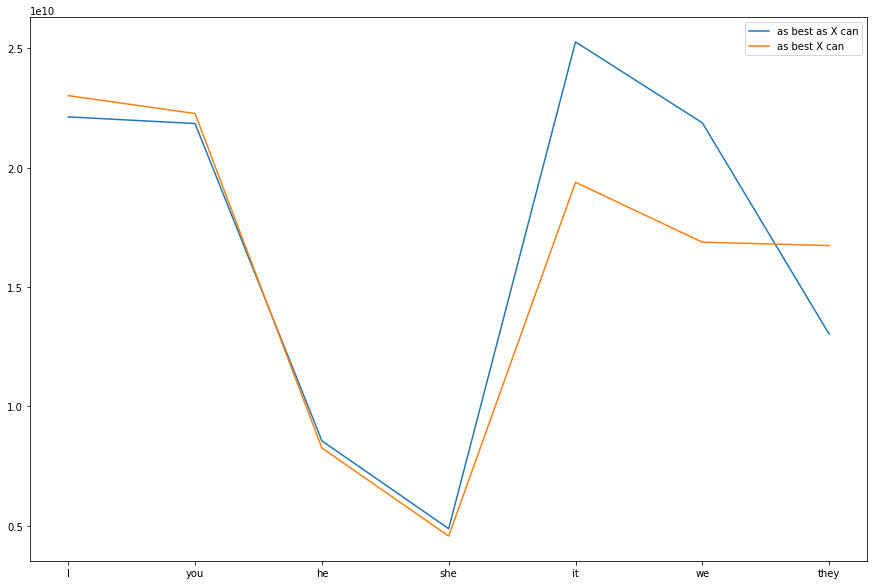

In [154]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))

ph1 = plt.plot(totals[0])
ph2 = plt.plot(totals[1])

plt.xticks(range(len(ps)), labels = ps)
plt.legend((ph1[0], ph2[0]), phrases)

plt.show()

*These results look much different from the ones in the LanguageLog post.  Here, the results look like they are nearly neck and neck. Also observe that the majority of the hits are in the billions.*


*There is one more online corpus that could be useful for our purposes: Google Books.  Google Books has a Ngram Viewer that allows us to graphically compare the relative frequencies of a number of phrases.  This corpus is not without its problems (a good blog on this can be found [here](http://stanford.edu/~risi/tutorials/absolute_ngram_counts.html "Google Ngrams Critique")), but it offers us a quick and easy way to compare frequencies in a huge corpus.*

*The blog linked in the previous paragrah also showed a method for replicating the results of web query in a jupyter notebook with `IFrame`.  One drawback of this is that it's only possible to replicate one query per notebook cell, which means it's not possible to iterate through all the queries.  However, to simplify things somewhat, I did create a function that would require us to specify nothing but the pronoun in the two phrases we wanted to compare.*

In [155]:
from IPython.display import IFrame

def compare_best_as(pronoun):
    
    return IFrame("https://books.google.com/ngrams/graph?content=as+best+as+" + pronoun + "+can%2C+as+best+" + pronoun +  "+can&year_start=1800&year_end=2000&corpus=15&smoothing=3",
       width=1100, height=700 )

In [156]:
compare_best_as("I")

In [157]:
compare_best_as("you")

In [158]:
compare_best_as("he")

In [159]:
compare_best_as("she")

In [160]:
compare_best_as("it")

In [161]:
compare_best_as("we")

In [162]:
compare_best_as("they")

*When we examine the graphs, we see that the phrase "as best p can" is much more common than "as best as p can".  While Google Books is not a perfect corpus, I feel it's fair to assume that an occurence of a phrase in a written work is more likely to be grammatically correct than one found online, so we should treat the Google Books results as more reliable than the basic Google query.  Furthermore, the fact that the two sets of results are so different should cause us to cast doubt on the idea of using basic Google queries for linguistic analysis.*

##### 36. 

◑ Study the *lolcat* version of the book of Genesis, accessible as `nltk.corpus.genesis.words('lolcat.txt')`, and the rules for converting text into *lolspeak*. Define regular expressions to convert English words into corresponding lolspeak words.


In [163]:
lolcat_gen = nltk.corpus.genesis.words('lolcat.txt')
print(lolcat_gen[:20])

['Oh', 'hai', '.', 'In', 'teh', 'beginnin', 'Ceiling', 'Cat', 'maded', 'teh', 'skiez', 'An', 'da', 'Urfs', ',', 'but', 'he', 'did', 'not', 'eated']


*Unfortunately, the link for lolcat rules given in the NLTK book (http://www.lolcatbible.com/index.php?title=How_to_speak_lolcat) appears to be permanently online.  Also, it does not appear that Wikipedia currently has a page with the rules of lolspeak.  I was able to find an academic paper that discussed the lolcat phenomenon [here](https://www.academia.edu/25368696/A_comparative_analysis_of_LOLspeak_and_dogespeak "LOLspeak paper") (registration required).  The paper did give numerous examples of LOLspeak, but unfortunately there was not an exhaustive grammar.*

*Without going into too much detail, let me just state that I think it's extremely difficult to create software that is able to programmatically translate normal English into lolspeak.  As far as I can tell, the vast majority of lolspeak online has been produced by humans who apply the 'rules' of lolspeak 'grammar' arbitrarily. While it is possible to do a lot with regular expressions, we would still need to know the parts of speech of many of the words in the phrase in question in order to 'accurately' translate it into lolspeak.  While this may be technically feasible, it would still represent more work than I'm willing to put in at the moment.*

*Ultimately though, regular expressions would not be enough, as there are numerous and notable exceptions to the rules.  For example, it seems that there is a rule that 'ee' should be reduced to 'e' (e.g., 'indeed' -> 'inded', 'need' -> 'ned', etc...).  But if we applied this rule generally, we'd lose perhaps the most famous example of lolspeak: 'cheeseburger' -> 'cheezburger'.  The best way to deal with this is a lookup function.  Such a dictionary would surely be quite large and making it would be a lot of work; but fortunately, I was able to find one [here](https://github.com/ddribin/lolspeak 'lolspeak dictionary').  The dictionary is saved as `tranzlator.yml`, and it is simple to import yaml files with the module `yaml`.*

*For those words not in the dictionary, there is a series of `re.sub()` commands to make the transformations commonly seen in lolspeak.  I tried to use a `for` loop to iterate through all the possible transformations (as I did above for exercise 24), but for whatever reason this wouldn't work here.*

*This is a very simplified model and is not able to capture all of the nuance of lolspeak.  Namely, much of the grammatical variation in lolspeak is not easily captured with regular expressions, so for the sake of expediency this was ignored.*

In [164]:
import yaml

with open('tranzlator.yml') as f:
    
    d = yaml.load(f, Loader = yaml.FullLoader)


def convert_to_lolspeak(text):
    """
    Converts a text to lolspeak.
    """
    
    text_list = text.split()

    # convert everything to lowercase so we can search for terms 
    # in the dictionary
    text_list = [t.lower() for t in text_list]

    # replace those terms that can be found in the lolspeak dictionary
    for i in range(len(text_list)):
        if text_list[i] in d:
            text_list[i] = d[text_list[i]].upper()

    new_list = []

    # use regular expressions for the rest
    for t in text_list:
        # the values with matches in the lolspeak dictionary 
        # have been convered to uppercase words,
        # so the next conditional will run only 
        # on words that haven't been modified
        if t.islower():
            
            org = [r'er', r'ight', r'[^s]s\b', r'ss', r'tion|sion', r'ing', 
                   r'ture', r'ove', r'ear', r'ee']
            sub = ['r', 'ite', 'z', 's', 'shun', 'in', 'chur', 'oov', 'er', 'e']
            
            for i in range(len(org)):
                t = re.sub(org[i], sub[i], t)      
            
            if len(t) > 3 and t[-1] != 'd':
                t = re.sub('ed', 'd', t)
                
        # for stylistic reasons, everything will be returned in uppercase
        new_list.append(t.upper())

    # there's just one grammatical exception I'm going to deal with 
    # in this function: converting "can I" to "I CAN"
    string = ' '.join(new_list)
    string = re.sub(r'CAN I', 'I CAN', string)

    return string

In [165]:
test = "can i the cheeseburger ?"

print(convert_to_lolspeak(test))

I CAN TEH CHEEZBURGER ?


In [166]:
test = 'this is just another test to see how lolspeak responds in this situation'

print(convert_to_lolspeak(test))

DIS IZ JUS ANOTHR TEST 2 C HOW LOLSPEAK RESPONDZ IN DIS SITUASHUN


In [167]:
test = 'dogs and people seem a bit strange in lolspeak'

print(convert_to_lolspeak(test))

DOZ AN PEEPS SEM  BIT STRANGE IN LOLSPEAK


##### 37.

◑ Read about the `re.sub()` function for string substitution using regular expressions, using `help(re.sub)` and by consulting the further readings for this chapter. Use `re.sub` in writing code to remove HTML tags from an HTML file, and to normalize whitespace.

*Below is the first result I got when I googled 'simple HTML example'.  The site was at [this address](http://help.websiteos.com/websiteos/example_of_a_simple_html_page.htm "simple html example").*

In [168]:
example = """
<HTML>

<HEAD>

<TITLE>Your Title Here</TITLE>

</HEAD>

<BODY BGCOLOR="FFFFFF">

<CENTER><IMG SRC="clouds.jpg" ALIGN="BOTTOM"> </CENTER>

<HR>

<a href="http://somegreatsite.com">Link Name</a>

is a link to another nifty site

<H1>This is a Header</H1>

<H2>This is a Medium Header</H2>

Send me mail at <a href="mailto:support@yourcompany.com">

support@yourcompany.com</a>.

<P> This is a new paragraph!

<P> <B>This is a new paragraph!</B>

<BR> <B><I>This is a new sentence without a paragraph break, in bold italics.</I></B>

<HR>

</BODY>

</HTML>
"""

In [169]:
# getting rid of tages
example = re.sub(r'<.*?>', '', example)

# normalizing whitespace
example = re.sub(r'\s+', ' ', example)
example

' Your Title Here Link Name is a link to another nifty site This is a Header This is a Medium Header Send me mail at support@yourcompany.com. This is a new paragraph! This is a new paragraph! This is a new sentence without a paragraph break, in bold italics. '

##### 38. 

★ An interesting challenge for tokenization is words that have been split across a line-break. E.g. if *long-term* is split, then we have the string `long-\nterm`.

 * a. Write a regular expression that identifies words that are hyphenated at a line-break. The expression will need to include the `\n` character.
 
 * b. Use `re.sub()` to remove the `\n` character from these words.
 
 * c. How might you identify words that should not remain hyphenated once the newline is removed, e.g. `'encyclo-\npedia'`?

In [170]:
#a

test = "I'm trying to find the long-\nterm solution in this encyclo-\npedia."
re.findall(r'\b\w*-\n\w*\b', test)

['long-\nterm', 'encyclo-\npedia']

In [171]:
#b 

re.sub(r'-\n', '-', test)

"I'm trying to find the long-term solution in this encyclo-pedia."

*The easiest to accomplish part __c.__ is to try to perform some sort of look up of the hyphenated word.  If the hyphenated word is in the word list, the hyphen stays in; otherwise it's removed.*

*Unfortunately, the English wordlist provided doesn't have many hyphenated words:*

In [172]:
for w in wordlist:
    if '-' in w:
        print(w)

jean-christophe
jean-pierre


*So we'll have to create one using one of the corpora.  I'm sure the Brown Corpus has hyphenated words, so let's use that:*

In [173]:
brown_words = sorted(set([w.lower() for w in nltk.corpus.brown.words()]))

*The function below uses regular expressions to find all the hyphenated words with line breaks in a text.  It iterates through all the hits, checking them against a master word list.  If the hyphenated form is in the word list, the hyphen stays in; otherwise it is removed.*  


In [174]:
def check_line_break(text, wordlist):
    """
    Finds hyphenated words with line breaks in a text and 
    removes hyphens if they are the results of a split on 
    a line break.
    
    Arguments:
    
    text:     String which may have hyphens.
    wordlist: List of accepted word forms.
    """
    
    # the function will only run if there's a hyphen in the string.
    if '-' in text:
        
        # find all the hyphenated words
        hyphen = re.findall(r'\b\w*-\n\w*\b', text)
        
        # perform lookup for each hyphenated word
        for h in hyphen:
            # remove the newspace to get the hyphenated form
            check = re.sub(r'-\n', '-', h)
            
            # keep the hyphen if the hyphenated form is in the wordlist
            if check in wordlist:
                text =  re.sub(h, check, text)
            # otherwise remove it
            else:
                text = re.sub(h, re.sub(r'-\n', '', h), text)
    
    return text

In [175]:
test = "I'm trying to find the long-\nterm solution."

check_line_break(test, brown_words)

"I'm trying to find the long-term solution."

In [176]:
test = "The word encyclo-\npedia shouldn't have a hyphen."

check_line_break(test, brown_words)

"The word encyclopedia shouldn't have a hyphen."

*The function won't break if there aren't any hyphens.*

In [177]:
test = "This is a test."
check_line_break(test, brown_words)

'This is a test.'

*And it should find all the hyphenated words with line breaks inside of them:*

In [178]:
test = "I'm trying to find the long-\nterm solution in this encyclo-\npedia."

check_line_break(test, brown_words)

"I'm trying to find the long-term solution in this encyclopedia."

##### 39. 

★ Read the Wikipedia entry on *Soundex*. Implement this algorithm in Python.

*I've basically recreated the algorithm as outlined in the Wikipedia entry.  There's one place in the Wikipedia entry where the explanation is a little confusing (if not downright inaccurate): In the first step, we want to drop only the non-initial occurrences of "h" and "w".  We want to replace vowels with zeros in case they come between two instances of consonants with identical values.  In a later stage, consecutive duplicate consonant values will be merged into one, unless they occur on either side of a vowel.  Therefore, we want to retain the zeros until the previous step is finished.*

In [179]:
def get_soundex_digit(chr):
    """
    Returns a numerical digit based on a consonant's value
    in the Soundex algorithm.
    """
        
    cs = ['bfpv', 'cgjkqsxz', 'dt', 'l', 'mn', 'r']
    for i in range(len(cs)):
        if chr.lower() in cs[i]:
            return str(i + 1)
        
    return "0"

def remove_consecutive_duplicates(text):
    """
    Returns a string with consecutive duplicates removed.
    """
    
    new_text = text[0]
    
    for i in text[1:]:
        if i != new_text[-1]:
            new_text += i
            
    return new_text

def create_soundex(name):
    """
    Uses the Soundex algorithm to create an index for a name.
    """
    
    # Start with the first letter.  Capitalize this letter
    # if it's not already capitalized.
    soundex = name[0].upper()
    
    # Remove all occurrences of h and w
    name = re.sub(r'[hw]', '', name[1:])
    
    # Replace vowels with zeros. After we assign values to consonants,
    # consecutive identical values will be removed, except in 
    # the case that they are on either side of a vowel. So the zeros will
    # be retained until this point.  After this they will be deleted.
    name = re.sub(r'[aeiouy]', '0', name)
    
    # Replace all consonants with digits using get_soundex_digit
    new_name = ''
    for n in name:
        new_name += (re.sub(r'[^0]', get_soundex_digit(n), n))

    name = new_name
    
    # Replace all adjacent identical digits with one digit
    name = remove_consecutive_duplicates(name)

    # First digit can't be of the same group as the beginning character
    if get_soundex_digit(soundex) == name[0]:
        name = name[1:]
    
    # Remove zeros
    name = re.sub(r'0', '', name)
    
    # In case everything after the first letter is a vowel
    if len(name) == 0:
        return soundex + ('000')
        
    soundex += name
    
    # Index can only be four characters long
    if len(soundex) == 4:
        return soundex
    elif len(soundex) > 4:
        return soundex[:4]
    else:
        # Add zeros if the index is shorter than 4
        while len(soundex) < 4:
            soundex += "0"

        return soundex
        
    
        

*These were the examples given on the Wikipedia entry for Soundex.  My code returned the same results as the Wikipedia entry.*

In [180]:
names = ["Robert", "robert", "Rubin", "Ashcraft", "Ashcroft", "Tymczak", 
         "Pfister", "Honeyman"]

print([create_soundex(n) for n in names])

['R163', 'R163', 'R150', 'A261', 'A261', 'T522', 'P236', 'H555']


*Found a bunch of examples of Soundex indexing [at this blog here](https://sistemanalize.wordpress.com/2017/12/21/big-data-phonetic-similarity-soundex/ "Soundex examples").  My code returned the same values as those on the blog.*

In [181]:
names = ["Fairdale", "Jonson", "Jonston", "Smith", "MacDonald", "Mayer",
         "Admire", "Smire", "Amire", "Mayes"]

print([create_soundex(n) for n in names])

['F634', 'J525', 'J523', 'S530', 'M235', 'M600', 'A356', 'S560', 'A560', 'M200']


In [182]:
names = ["Mayo", "Meiers", "Mierins", "Miers", "Mimre", "Miranda", 
         "Mirfe", "Mirissimo"]

print([create_soundex(n) for n in names])

['M000', 'M620', 'M652', 'M620', 'M560', 'M653', 'M610', 'M625']


##### 40. 

★ Obtain raw texts from two or more genres and compute their respective reading difficulty scores as in the earlier exercise on reading difficulty. E.g. compare ABC Rural News and ABC Science News (`nltk.corpus.abc`). Use Punkt to perform sentence segmentation.

In [183]:
abc = nltk.corpus.abc

*Instead of reinventing the wheel, I'm just going to redo the function `get_brown_ari` that I wrote above for question 29.  The only difference worth mentioning is that we have to add the name of the corpus as one of the arguments.*

In [184]:

def get_ari(corpus, cat):
    """
    Returns the Automated Readability Index (ARI) of a given
    category of a NLTK corpus.
    """
    
    # calculate total letters in the category
    total_letters = 0
    for w in corpus.words(fileids = cat):
        total_letters += len(w)
    
    # calculate average number of letters per word
    mu_w = total_letters/len(corpus.words(fileids = cat))
    
    # calculate average number of words per sentence
    mu_s = len(corpus.words(fileids = cat)) / len(corpus.sents(fileids = cat))
    
    return (4.71 * mu_w) + (0.5 * mu_s) - 21.43

In [185]:
print("In the ABC Corpus, the Automated Readability Index (ARI) for the category:\n")

for f in abc.fileids():
    ari = get_ari(abc, f)
    f = re.sub('.txt', '', f)
    print("{:45}...\"{}\" is {:.4f}.".format("",f.title(), ari) )

In the ABC Corpus, the Automated Readability Index (ARI) for the category:

                                             ..."Rural" is 12.3487.
                                             ..."Science" is 12.5276.


##### 41.

★ Rewrite the following nested loop as a nested list comprehension:

```	
>>> words = ['attribution', 'confabulation', 'elocution',
...          'sequoia', 'tenacious', 'unidirectional']
>>> vsequences = set()
>>> for word in words:
...     vowels = []
...     for char in word:
...         if char in 'aeiou':
...             vowels.append(char)
...     vsequences.add(''.join(vowels))
>>> sorted(vsequences)
['aiuio', 'eaiou', 'eouio', 'euoia', 'oauaio', 'uiieioa']
```

In [186]:
words = ['attribution', 'confabulation', 'elocution',
         'sequoia', 'tenacious', 'unidirectional']

sorted(set([''.join([char for char in word if char in 'aeiou']) for word in words]))


['aiuio', 'eaiou', 'eouio', 'euoia', 'oauaio', 'uiieioa']

##### 42. 

★ Use WordNet to create a semantic index for a text collection. Extend the concordance search program in [3.6](https://www.nltk.org/book/ch03.html#code-stemmer-indexing "3.6"), indexing each word using the offset of its first synset, e.g. `wn.synsets('dog')[0].offset` (and optionally the offset of some of its ancestors in the hypernym hierarchy).

*I found this question very confusing.  For one thing, it's not clear what a semantic index is.  Googling the term will bring up lots of results about __Latent Semantic Indices (LSI)__, but it appears this is something completely different (btw, decent tutorial on LSIs [here](https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python "semantic indexing tutorial")).*

*I surmise the authors are asking for something similar to what is presented in [this paper](https://acl-arc.comp.nus.edu.sg/archives/acl-arc-090501d4/data/pdf/anthology-PDF/W/W00/W00-1104.pdf "Semantic Indexing using WordNet Senses"), which was written by Rada Mihalcea, currently a professor at Michigan and a major player in NLP. In the paper, words in a query are indexed by suffixing the WordNet offset.  While this idea incorporates the offset of the words in the texts, I still have no idea how this relates to the concordance search program in 3.6.  Since I'm not about to contact the authors to ask them to clarify this question, the only thing I can realistically do is answer this question to the best of my understanding.* 



*In my function, I will suffix word offsets to all the words in a text that are not stopwords. I will also suffix the part of speech, in case we later want to retrieve the synsets from the offsets. I will use lemmatized forms of the words to prevent different forms of the same word being matched to different offsets. There is one additional issue: trying to look up the offset of a word that has no synset will throw an error, so I added a `try ... except` clause to my function.*

In [190]:
import nltk 
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

def make_semantic_index(text, ancestors = False):
    """
    Suffixes the offset of a word's first WordNet synset to 
    lemmatized words in a text.  Only words that are not 
    stopwords are analyzed.
    """
    
    # get stopwords
    stop = stopwords.words('english')
    
    # use lemmas, so all word forms return the same offset
    wnl = nltk.WordNetLemmatizer()
    
    indexed = []
    
    for t in text.split():
        
        t_lemma = wnl.lemmatize(t.lower())
        
        # only add offsets to non-stopwords
        if t_lemma not in stop:
        
            # some words have no synset, and looking 
            # them up will throw an error
            try:
                index = str(wn.synsets(t_lemma)[0].offset())
                index += wn.synsets(t_lemma)[0].pos()
                
                if ancestors == True:
                    
                    hp = str(wn.synsets(t_lemma)[0].hypernyms()[0].offset())
                    hp += wn.synsets(t_lemma)[0].hypernyms()[0].pos()
                    index = '||'.join((index, hp))
                    
                indexed.append('|'.join((t, index)))
            except IndexError:
                indexed.append(t)
                
        else:
            indexed.append(t)
            
    # join the list as a string and return it
    return ' '.join(indexed)

In [188]:
url = 'https://www.nytimes.com/2019/10/21/us/california-homeless-backlash.html?fallback=0&recId=1SYcSgtQJYxBu1CiMNgqELRgdmq&locked=0&geoContinent=NA&geoRegion=WA&recAlloc=top_conversion&geoCountry=US&blockId=most-popular&imp_id=189862191&action=click&module=trending&pgtype=Article&region=Footer'
homeless = return_URL_contents(url)

# getting rid of header and footer - used trial and error to find this
homeless = homeless[270:-2434]

*Without "ancestors" (i.e., hypernyms):*

In [191]:
make_semantic_index(homeless)[:1000]

'As Homelessness|13943053n Surges|7440240n in California, So Does|8132955n a Backlash|7350192n Tent|4411264n encampments|8518171n across|272951r California|9060768n are testing|639975n residents’ tolerance|5033410n and compassion|7553741n as street|4334599n conditions|13920835n deteriorate. A homeless|10182190n encampment|8518171n in San Francisco. Homelessness|13943053n is an expanding|2077148v crisis|13933560n that many|1551633a California|9060768n residents|10523519n say|14485526n has|13888783n tested|2531625v the tolerance|5033410n and liberal|10256756n values|5856388n for which the state|8654360n is better|5143558n known. Credit|6688274n Jim Wilson/The New|1640850a York|8159924n Times|7309599n By Thomas|11339534n Fuller|10985653n , Tim Arango and Louis|11141709n Keene Oct. 21, 2019 [Sign up for our daily|6267564n newsletter|6681976n about news|6642138n from California|9060768n here .] OAKLAND, Calif.|9060768n — Insults|6715223n like|5845888n “financial parasites” and “bums” have b

*With "ancestors".  As you can see, the offsets are often very close, indicating semantic similarity.*

In [192]:
make_semantic_index(homeless, ancestors = True)[:1000]

'As Homelessness|13943053n||13920835n Surges|7440240n||7405893n in California, So Does|8132955n||8123167n a Backlash|7350192n||7309781n Tent|4411264n||4191595n encampments|8518171n||8651247n across California are testing|639975n||639556n residents’ tolerance|5033410n||5032565n and compassion|7553741n||7553301n as street|4334599n||4426618n conditions|13920835n||24720n deteriorate. A homeless|10182190n||9630641n encampment|8518171n||8651247n in San Francisco. Homelessness|13943053n||13920835n is an expanding|2077148v||230746v crisis|13933560n||14411243n that many California residents|10523519n||9620078n say|14485526n||14483917n has|13888783n||13888491n tested|2531625v||670261v the tolerance|5033410n||5032565n and liberal|10256756n||9605289n values|5856388n||5856066n for which the state|8654360n||8491826n is better|5143558n||5142180n known. Credit|6688274n||6686736n Jim Wilson/The New York|8159924n||7971582n Times|7309599n||7308889n By Thomas Fuller , Tim Arango and Louis Keene Oct. 21, 2

*Here's how we can retrieve a synset from an offset:*

In [193]:
wn.synset_from_pos_and_offset('n', 13943053)

Synset('homelessness.n.01')

*We can use regular expressions to retrieve offsets from the above function.*

In [194]:
print(re.findall(r'\d{8}\w', make_semantic_index(homeless, ancestors = True)[:1000]))

['13943053n', '13920835n', '13920835n', '10182190n', '13943053n', '13920835n', '13933560n', '14411243n', '10523519n', '14485526n', '14483917n', '13888783n', '13888491n', '10256756n']


*And then we can retrieve the synsets with these offsets:*

In [195]:
for r in re.findall(r'\d{8}\w', make_semantic_index(homeless, ancestors = True)[:1000]):
    print(wn.synset_from_pos_and_offset(r[8], int(r[:8])))

Synset('homelessness.n.01')
Synset('condition.n.01')
Synset('condition.n.01')
Synset('homeless.n.01')
Synset('homelessness.n.01')
Synset('condition.n.01')
Synset('crisis.n.01')
Synset('situation.n.03')
Synset('resident.n.01')
Synset('say.n.01')
Synset('opportunity.n.01')
Synset('hour_angle.n.02')
Synset('angular_distance.n.01')
Synset('liberal.n.01')


##### 43. 

★ With the help of a multilingual corpus such as the Universal Declaration of Human Rights Corpus (`nltk.corpus.udhr`), and NLTK's frequency distribution and rank correlation functionality (`nltk.FreqDist`, `nltk.spearman_correlation`), develop a system that guesses the language of a previously unseen text. For simplicity, work with a single character encoding and just a few languages.

*To use Spearman's Rank Correlation, we need two ranks to compare.  The easiest ranks for us to use will probably be lists of the most frequent letters in the language we're trying to guess and the language we're comparing it to.  Although this approach is quite basic, it works fairly well.*

*The function below will take a text, and compare the rankings of the most common letters in the text with the rankings of the most common letters of all other languages in the UDHR corpus with the same character encoding:*

In [196]:
import nltk, re
from nltk import word_tokenize
from nltk.corpus import udhr
from nltk.metrics.spearman import *

def guess_language(text, encoding = '-Latin1'):
    
    # text has to be a list, so convert if it's not
    if type(text) != list:
        text = word_tokenize(text)
        
    # create frequency distribution for the letters in the text
    fd = nltk.FreqDist([ch for ch in [ch for word in text for ch in word.lower() if word.isalpha()]])
    
    # create a ranking of the most common letters in the text
    ranked_letters = [l for r, l in sorted([(v, k) for k, v in fd.items()], reverse = True)]
    
    # get a list of languages with specified encoding
    languages = [l for l in nltk.corpus.udhr.fileids() if l.endswith(encoding)]

    max_corr = float('-inf')
    top_cand = ''

    # loop through all the languages and find the one with the highest spearman correlation
    for lang in languages:
        fd = nltk.FreqDist([ch for ch in [ch for word in udhr.words(lang) for ch in word.lower() if word.isalpha()]])
        fd_letters = [l for r, l in sorted([(v, k) for k, v in fd.items()], reverse = True)]
        sc = spearman_correlation(ranks_from_sequence(ranked_letters), 
                               ranks_from_sequence(fd_letters))
        if sc > max_corr:
            top_cand, max_corr =  lang, sc

    # replace underscore with hyphen
    top_cand = re.sub('_', '-', top_cand)
    
    # remove encoding from language name
    top_cand = re.sub(encoding, '', top_cand)
    
    print("The most likely language is " + top_cand + ".")

*Test 1: Article in German*

In [197]:
url = 'https://www.tagesschau.de/ausland/brexit-1083.html'

de = return_URL_contents(url)

In [198]:
guess_language(de)

The most likely language is German-Deutsch.


*Test 2: Article in French*

In [199]:
url = "https://www.lemonde.fr/international/article/2019/10/23/brexit-le-parlement-britannique-range-l-accord-au-purgatoire-au-terme-d-une-journee-agitee_6016515_3210.html"
fr = return_URL_contents(url)

In [200]:
guess_language(fr)

The most likely language is French-Francais.


*Test 3: Article in Portuguese*

In [201]:
url = 'https://www.rtp.pt/noticias/lusa/brexit-boris-johnson-suspende-legislacao-do-acordo-apos-derrota-parlamentar_n1180932'
pt = return_URL_contents(url)

In [202]:
guess_language(pt)

The most likely language is Galician-Galego.


*This did not return the correct answer, but it was very close: Galician is spoken in Galicia, a district in Northwest Spain,  which borders Portugal. The Wikipedia entry for Galician states that some linguists even consider Galician to be a Portuguese dialect. Considering how small the UDHRs in each language are, it shouldn't be surprising that similar languages might generate false positives.*

*Test 4: Article in Ukrainian.  Ukrainian uses a different language encoding, which we need to specify as one of the arguments in `guess_language`.*

In [209]:
url = 'https://www.unian.ua/world/10728366-turechchina-ogolosila-pro-zavershennya-viyskovoji-operaciji-na-pivnochi-siriji.html'
ukr = return_URL_contents(url)

In [210]:
guess_language(ukr, encoding = '-UTF8')

The most likely language is Ukrainian.


*The Ukrainian UDHR is actually available in two encodings: UTF-8 and Cyrillic.  We have to be careful which encoding we chose, because we'll get the wrong result here if we use Cyrillic:*

In [211]:
guess_language(ukr, encoding = '-Cyrillic')

The most likely language is Mongolian-Khalkha.


##### 44. 

★ Write a program that processes a text and discovers cases where a word has been used with a novel sense. For each word, compute the WordNet similarity between all synsets of the word and all synsets of the words in its context. (Note that this is a crude approach; doing it well is a difficult, open research problem.)

*From what I can understand, the approach we're supposed to be taking is to make a list of words in a text and then calculate the path similarity between words and their neighbors.  If the path similarity is low, we could argue that this may be due to a novel usage of these words together.*

*But there is one HUGE problem (and a few smaller ones) with this approach: path similarity only works for a pair of words from the same part of speech.  Comparing words from different parts of speech will generate a path similarity score of zero.  Needless to say, it is very common for words to appear next to words from different parts of speech.  [This is an issue the creators/maintainers of NLTK are aware of](https://github.com/nltk/nltk/issues/1023 "Path Similarity with different POS"), but it does not appear that there are any changes to this on the horizon.*

*Another smaller problem is that many words have homonyms whose senses are from different parts of speech (e.g., 'saw' is most commonly the past tense of 'see', but it also has several different senses that are nouns), and there is no simple way for WordNet to deduce which part of speech should apply.*

*The final difficulty I will discuss here is that of determining the threshold.  I took twenty random pairs of nouns WordNet and calculated their similarity scores by taking the maximum score of all of their respective synsets.  The average of these scores was about 0.01.  I originally believed we could say that any similarity score below 0.01 is evidence of a novel sense of a word.  But upon reflection, this does not seem correct: we were using random pairs of words, so a score above 0.01 is only evidence of non-randomness, and novelness and non-randomness are far from the same thing.  A threshold of 0.1 will exclude practically all word pairs - those used novelly and not - so we'll have to set it somewhat higher.  Unfortunately, I can't recommend an absolute value to use, but I will provisionally use 0.1.*

*The function below only calculates path similarity scores for adjoining words.  It is possible to expand this to $n$ adjoining words in either direction, but this would increase the complexity of the function considerably, and would make the output much more difficult to read.  I'm not going to bother going through the hassle of trying to scale up this procedure for finding novel uses of a word, since I view it as fundamentally flawed.*

In [212]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
import re

def find_novel_usage(text, novelty_score = 0.1):
    """
    Calculates the path similarity of adjoining words in a text
    and prints out the words whose path similarity falls below
    a certain threshold
    
    Arguments:
    
    text:          The text to be analyzed.  Must be a string.
    novelty_score: The threshold below which pairs of words are
                   considered to be used together in a novel way.
                   Default is 0.1
    """

    # remove stopwords and puncutation
    content = [t for t in test.split() if t.lower() not in stopwords.words('english')]
    content = [re.sub(r'[.,!?\'"()\[\]]', '', c) for c in content]
    
    
    connections = ''
    path_scores = []

    # loop through the pairs of words and find the highest similarity score
    for i in range(len(content) - 1):
        term1 = wn.synsets(content[i])
        term2 = wn.synsets(content[i + 1])
        score = [v for v in [t1.path_similarity(t2) for t1 in term1 for t2 in term2] if isinstance(v, float)]
        
        # if there's no path similarity score, add zero
        if len(score) == 0:
            sim = 0
        # otherwise, add the maximum value
        else:
            sim = max(score)

        connections += ' | '.join((content[i], str(sim))) + " | "
        path_scores.append(sim)

    connections += content[-1]

    print("Similarity scores of content words:\n")
    print(connections, "\n")
    
    for i in range(len(path_scores)):
        if path_scores[i] < novelty_score and path_scores[i] != 0:
            print("Possible novel usage:", content[i], "&", content[i + 1])

*As mentioned above, 'saw' is normally used as a past tense of 'see, but since the following word ('airplane') is a noun, only senses of 'saw' as a noun are being compared for similarity here.*

In [213]:
test = 'i saw an airplane from the window of my apartment in the country'

find_novel_usage(test)

Similarity scores of content words:

saw | 0.09090909090909091 | airplane | 0.1 | window | 0.16666666666666666 | apartment | 0.1111111111111111 | country 

Possible novel usage: saw & airplane


In [214]:
test = 'i saw an airplane from the soul of my apartment in the revolution'

find_novel_usage(test)

Similarity scores of content words:

saw | 0.09090909090909091 | airplane | 0.08333333333333333 | soul | 0.125 | apartment | 0.07692307692307693 | revolution 

Possible novel usage: saw & airplane
Possible novel usage: airplane & soul
Possible novel usage: apartment & revolution


*I wanted to find something as close as possible to gibberish, so I ran the function over the opening line of Finnegan's Wake:*

In [215]:
test = "riverrun, past Eve and Adam's, from swerve of shore to bend of bay," \
       " brings us by a commodius vicus of recirculation back to Howth Castle and Environs"

find_novel_usage(test)

Similarity scores of content words:

riverrun | 0 | past | 0.3333333333333333 | Eve | 0.2 | Adams | 0.07142857142857142 | swerve | 0.16666666666666666 | shore | 0.2 | bend | 0.25 | bay | 0.2 | brings | 0.1111111111111111 | us | 0 | commodius | 0 | vicus | 0 | recirculation | 0.07142857142857142 | back | 0 | Howth | 0 | Castle | 0.2 | Environs 

Possible novel usage: Adams & swerve
Possible novel usage: recirculation & back


In [216]:
# a scholarly review of Finnegan's Wake

test = 'The entire book is written in a largely idiosyncratic language, '\
       'which blends standard English lexical items and neologistic '\
       'multilingual puns and portmanteau words to unique effect.'

find_novel_usage(test)

Similarity scores of content words:

entire | 0.09090909090909091 | book | 0.25 | written | 0.3333333333333333 | largely | 0 | idiosyncratic | 0 | language | 0.25 | blends | 0.2 | standard | 0.125 | English | 0 | lexical | 0 | items | 0 | neologistic | 0 | multilingual | 0 | puns | 0.08333333333333333 | portmanteau | 0.3333333333333333 | words | 0.09090909090909091 | unique | 0 | effect 

Possible novel usage: entire & book
Possible novel usage: puns & portmanteau
Possible novel usage: words & unique


*I was suprised to see a score for 'entire' & 'book'; but then I discovered there's actually a noun sense of the word 'entire'.*

In [217]:
wn.synsets('entire')

[Synset('stallion.n.01'),
 Synset('entire.s.01'),
 Synset('integral.s.02'),
 Synset('entire.s.03'),
 Synset('entire.s.04')]

In [218]:
entire = wn.synset('stallion.n.01')
entire.path_similarity(wn.synset('book.n.02'))

0.09090909090909091

##### 45. 

★ (★★★?) Read the article on normalization of non-standard words (Sproat et al, 2001), and implement a similar system for text normalization.

*The link to the bibliography for the NLTK book is broken, but it appears the authors are referring to "Normalization of non-standard words" by Richard Sproat et al., which I found [available here](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.228.200&rep=rep1&type=pdf "Normalization of non-standard words").  The article is over 40 pages long, and although I didn't go through the entire text (TLDR), it seems to be very complicated, and for that reason I added another two stars to the difficulty of this problem.*


*A very short summary would be: how do we deal with normalizing non-standard words, such as the abbreviations we'd see in a real estate ad like "eat-in kit livrm dinrm 17x25 famrm"?*

*While solving a problem such as this would obviously be good practice, it would require an immense amount of work - literally days (if not weeks, or even more).  And I am doubtful that I would gain much knowledge that could be applied to other problems in different domains.*

*Additionally, there's little sense in reinventing the wheel, since it appears there's already a Python module to deal with this: `normalise`, details of which are [available here](https://github.com/EFord36/normalise "normalise").  The module is also introduced in [this article](https://noisy-text.github.io/2017/pdf/WNUT14.pdf "normalise article").* 




In [219]:
from normalise import *

C:\Users\mjcor\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LabelPropagation from version 0.18 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [220]:
text = ["On", "the", "28", "Apr.", "2010", ",", "Dr.", "Banks", "bought", "a", "chair", "for", "£35", "."]

print(normalise(text, verbose = False))


['On', 'the', 'twenty-eighth of', 'April', 'twenty ten', ',', 'Doctor', 'Banks', 'bought', 'a', 'chair', 'for', 'thirty five pounds', '.']
